# Capture Traces for 27.12

In [1]:
%run "./Capture_traces_General.ipynb"

C:\Users\Samuel\AppData\Local\Temp\ipykernel_1880\4114886631.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✔️ The File uploader succesfuly imported.
✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.
✔️ The Analyser succesfuly runned.
✔️ The General functions/agregate succesfuly imported.


## Target [Basic Signed Char NO_OPT RAND] Measurement: 

  1. Measure target device in action
  2. Show dynamic SPA
  3. Calculate correlation matrixes (for 4 methods, that is HW8, HW32,  Abs8, Abs32) 

In [2]:
#firmwareName = 'basic_quantized3_MLP-Rand'
firmwareName = '2-akt-NO_OPT'
epochs_list = [1000]
decimate = 2
reverse = False

In [3]:
scope, target, cw_setuper = setup(f"makefile_dir_{firmwareName}")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_2-akt-NO_OPT/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 24059 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 24059 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 2b 2d cf 46 29 04 00 b4 78 d8 68 a7 00 ff 3f 2b f1 fc 00 d9 7a 96 09 2c 00 a5 57 74 64 c4 00 af 15 28 a4 e9 00 57 db 5e 20 fb 00 00 cd 00')


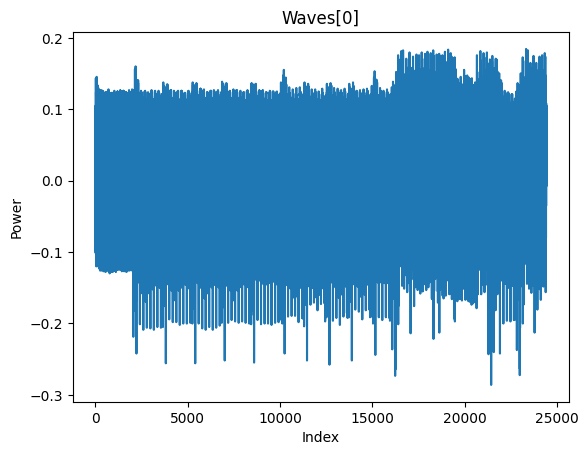

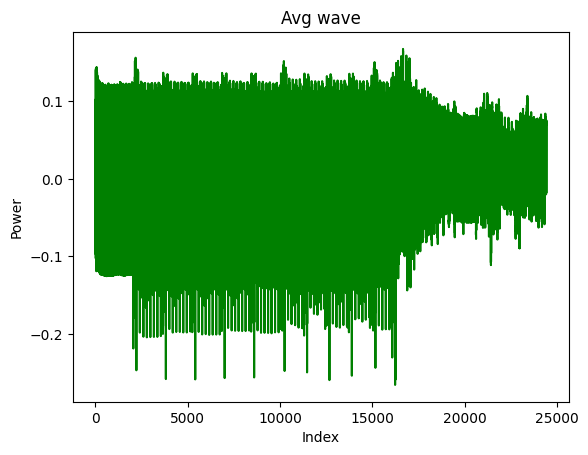

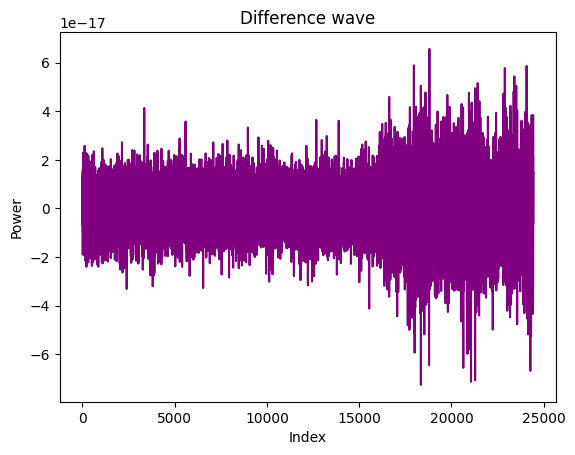

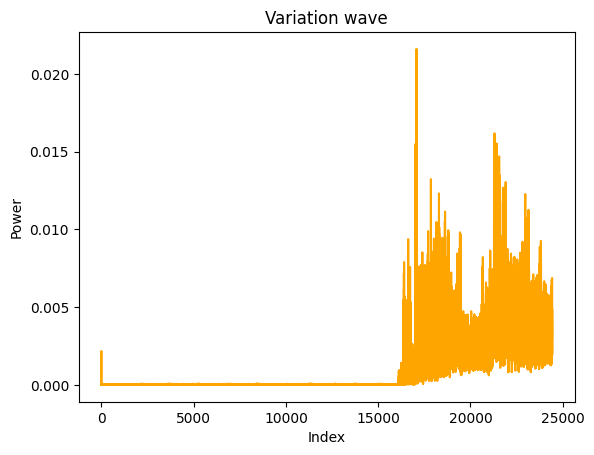

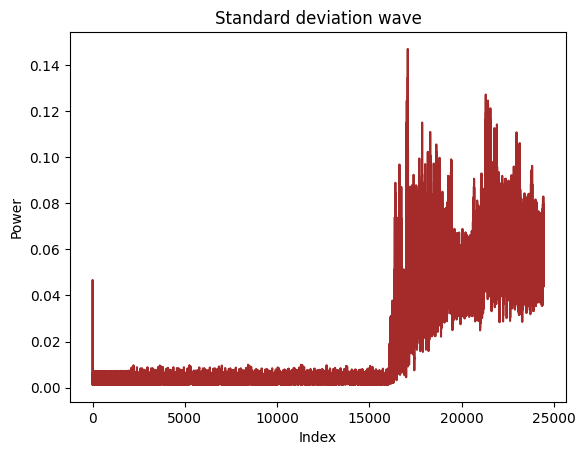

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

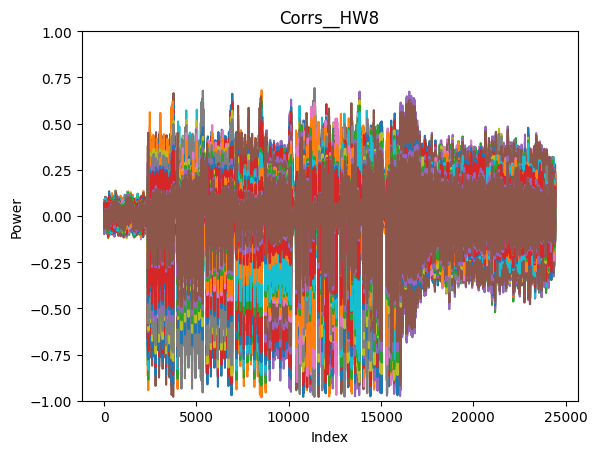

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

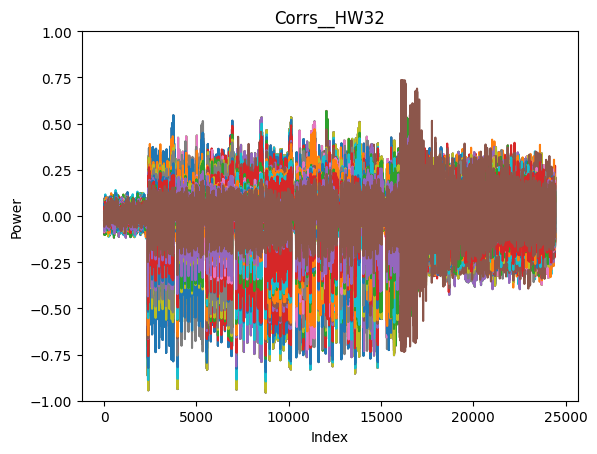

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

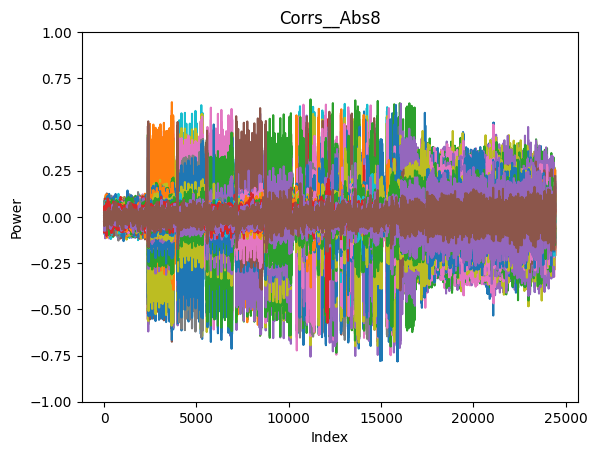

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

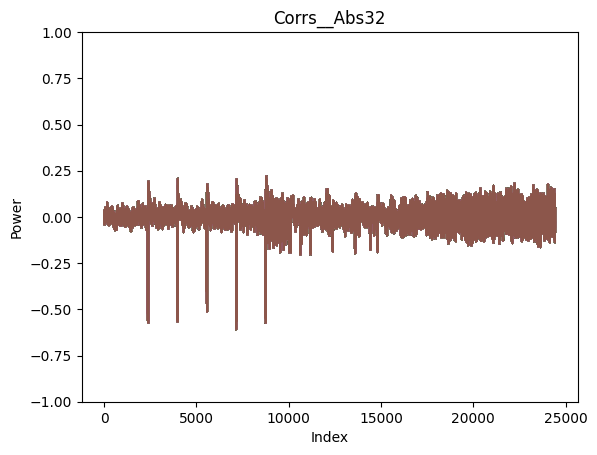

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [4]:
corr_HW8, corr_HW32, corr_Abs8, corr_Abs32, rand_inputs, waves, out, diff_avg, avg_wave, var = capture_correlate(scope=scope,
                                                                                                                      epochs_list = epochs_list,
                                                                                                                      decimate = decimate,
                                                                                                                      reverse = reverse,
                                                                                                                      runName=firmwareName)

### SPA

In [5]:
%run "./Analyser.ipynb"    

✔️ The Analyser succesfuly runned.


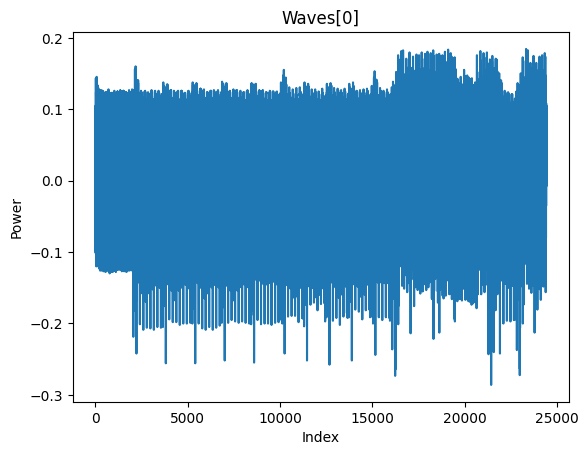

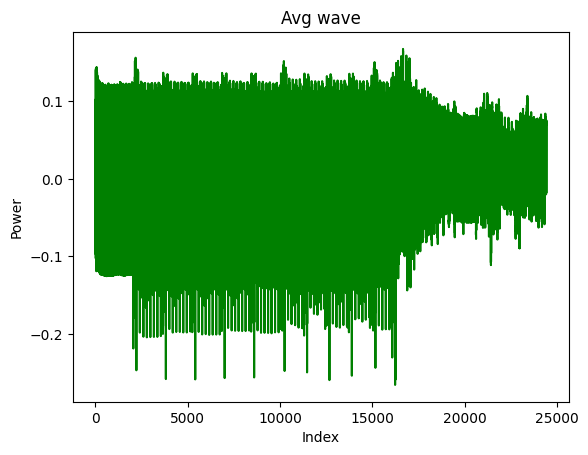

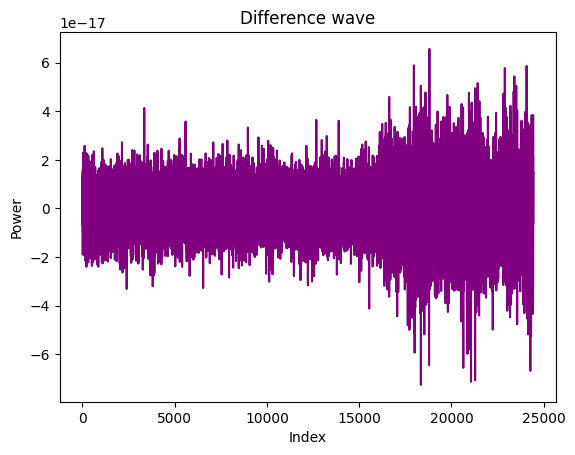

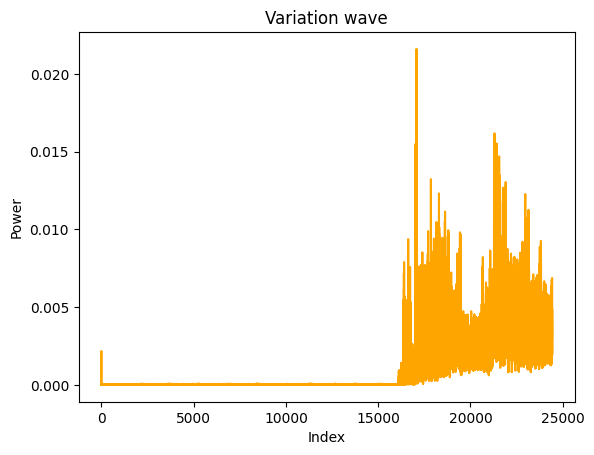

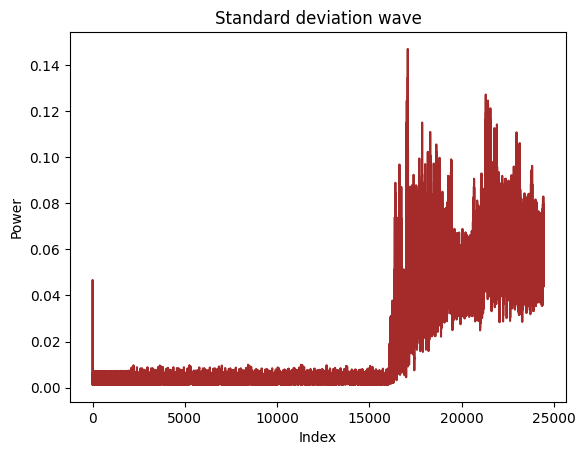

In [6]:
diff_avg2, avg_wave2, var2, ____ = createDiffWave(waves, firmwareName+"_2")

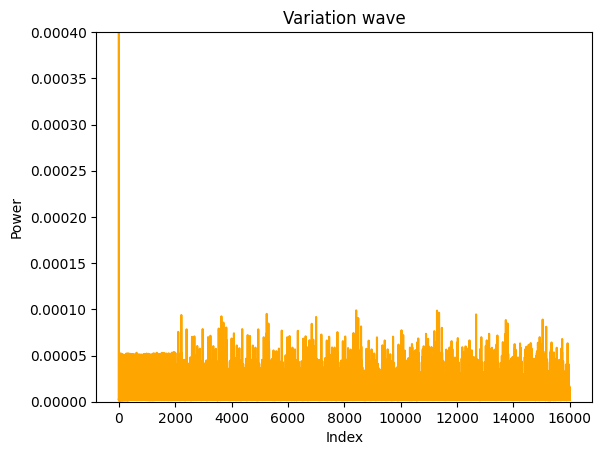

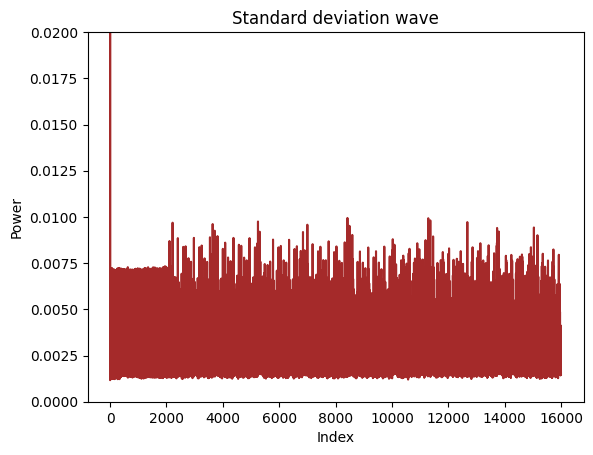

In [25]:
plot_mult(np.array(var2)[0:16000], _type = f"variation_{firmwareName}_2", mult=False, graph_title="Variation wave", ylabel="Power", color="orange", ylim=[0,0.0004]) #, ylim=var_ylim
plot_mult(np.array(var2**(0.5))[0:16000], _type = f"deviaton_{firmwareName}_2", mult=False, graph_title="Standard deviation wave", ylabel="Power", color="brown", ylim=[0,0.02]) #, ylim=var_ylim

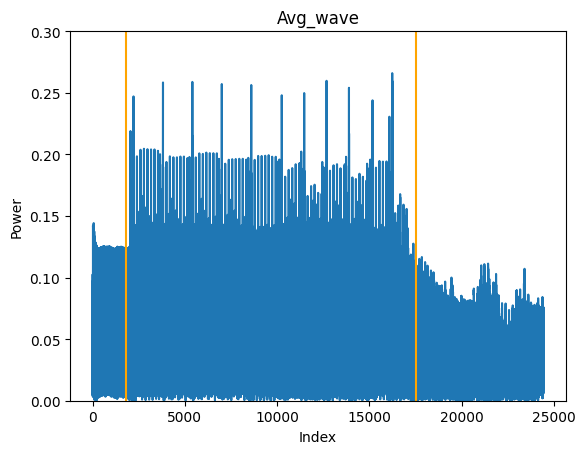

In [8]:
activity_borders = [1800, 17500]#[4100, 14500]#[0, 25000]
avg_wave = np.array(abs(avg_wave))
image = plot_mult(avg_wave, _type = f"avg_wave_{firmwareName}", mult=False, ylim=[-0.0,0.3], graph_title="Avg_wave", ylabel="Power", borders = activity_borders)

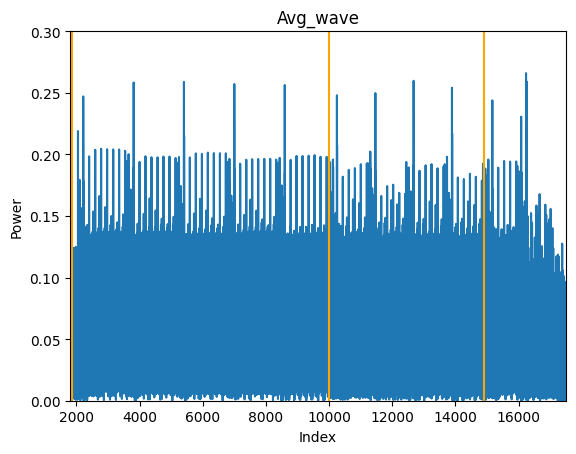

In [11]:
#prev_borders = next_borders
layer_borders = [1850, 10000, 14900]#[2000, 18000]
avg_wave = np.array(abs(avg_wave))
image = plot_mult(avg_wave, _type = "ANN_Active", mult=False, xlim=[activity_borders[0],activity_borders[1]],  ylim=[-0.0,0.3], graph_title="Avg_wave",
                  ylabel="Power", borders = layer_borders)

#### SPA of neuron's 1. layer

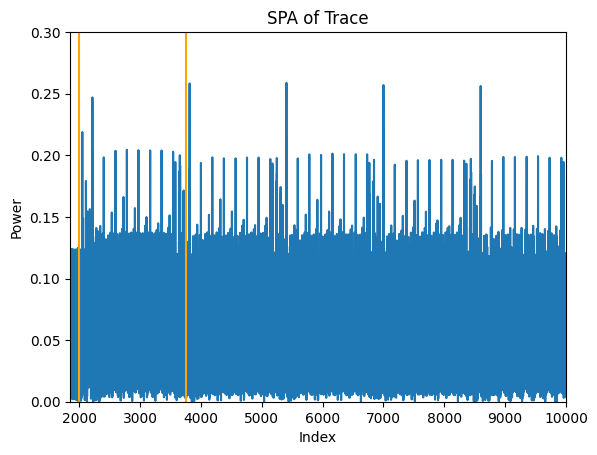

In [12]:
#prev_borders = next_borders
neuron_borders = [2000, 3750]# [4000, 7450]
avg_wave = np.array(abs(avg_wave))
plot_mult(avg_wave, _type = "Layer1", mult=False, xlim=[layer_borders[0],layer_borders[1]], ylim=[-0.0,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = neuron_borders)
offset = neuron_borders[1] - neuron_borders[0]

##### SPA of neuron's 1. layer, 1. neuron

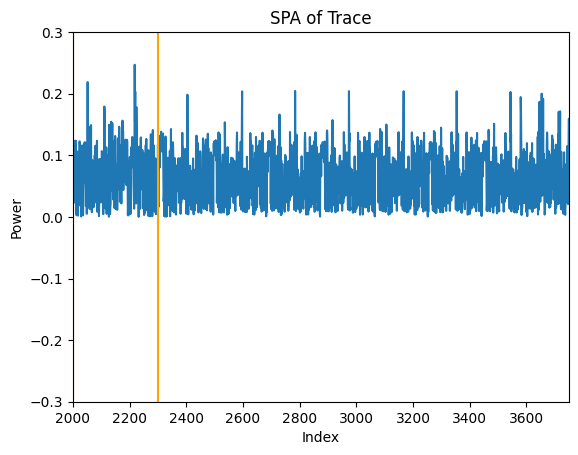

In [13]:
#prev_borders = next_borders
mult_borders = [2000,2300]# #[4100, 4800]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1_Neuron_1th", mult=False, xlim=[neuron_borders[0],neuron_borders[1]], ylim=[-0.3,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = mult_borders)

###### SPA of neuron's 1. layer, 1. neuron, 1. multiplication

- Showing 1*input correlations

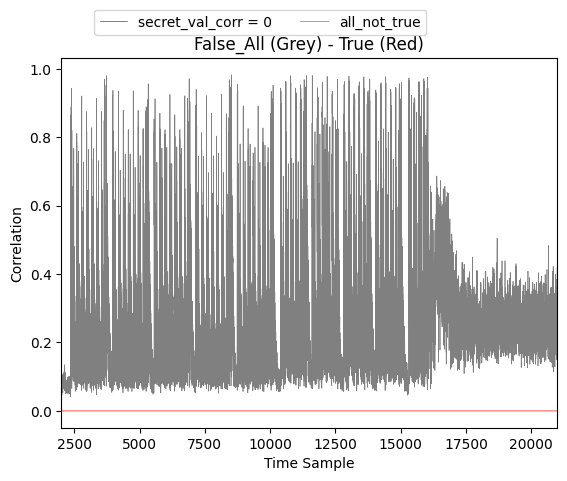

In [14]:
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map, true_secret = 0, xlim=[2000, 21000], true_last = False, saveName = f'CPA_mult_level_secret[{0}]')

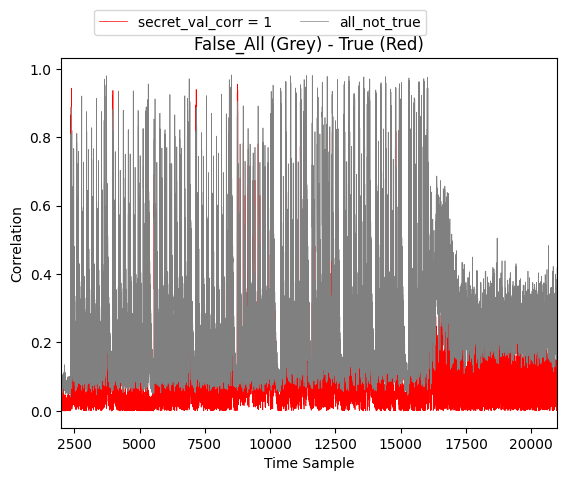

In [15]:
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map, true_secret = 1, xlim=[2000, 21000], true_last = False, saveName = f'CPA_mult_level_secret[{1}]')

- Showing true secret value, without 1-correlation

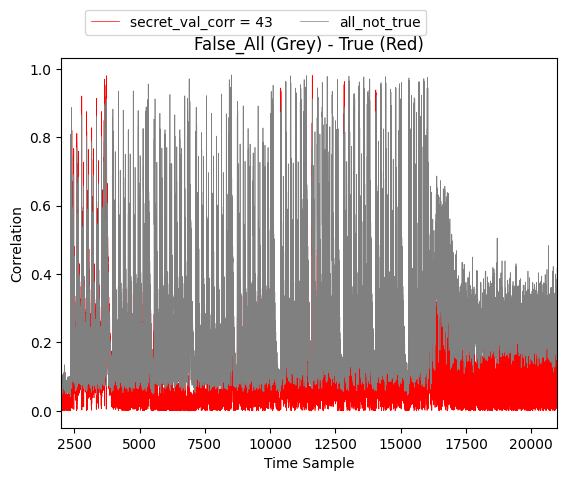

In [16]:
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map[2:256,:], true_secret = 45-2, xlim=[2000, 21000], true_last = False, saveName = f'CPA_mult_level_secret[{45}]-Without-1corr')

[ 45 207  70  41   4   0 180 120 216 104 167   0 255  63  43 241 252   0
 217 122 150   9  44   0 165  87 116 100 196   0 175  21  40 164 233   0
  87 219  94  32 251]


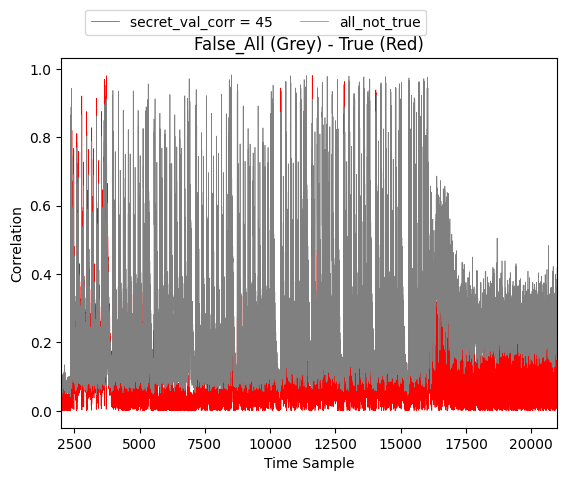

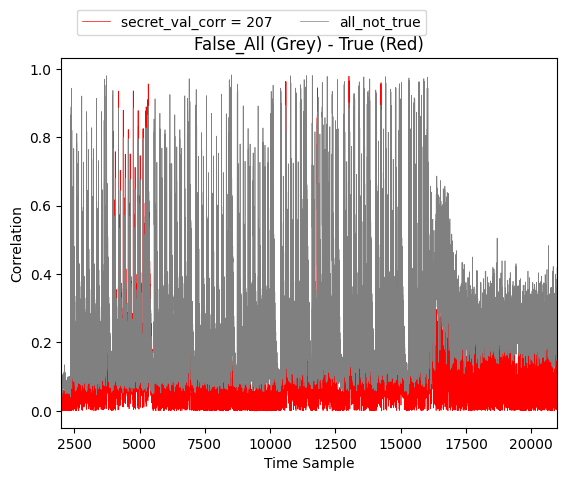

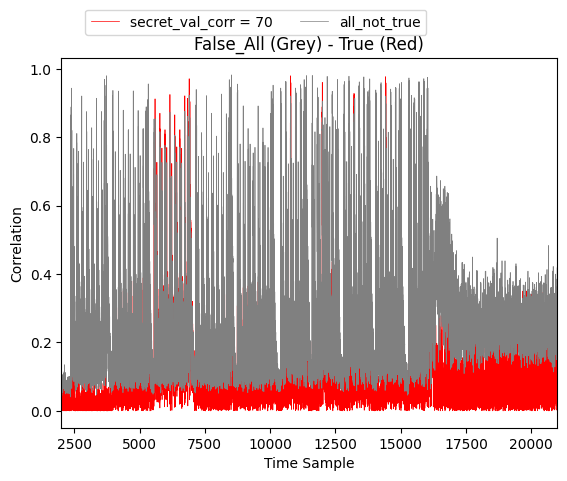

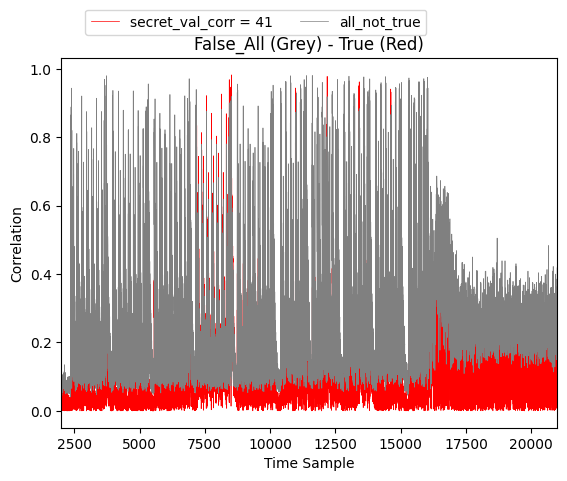

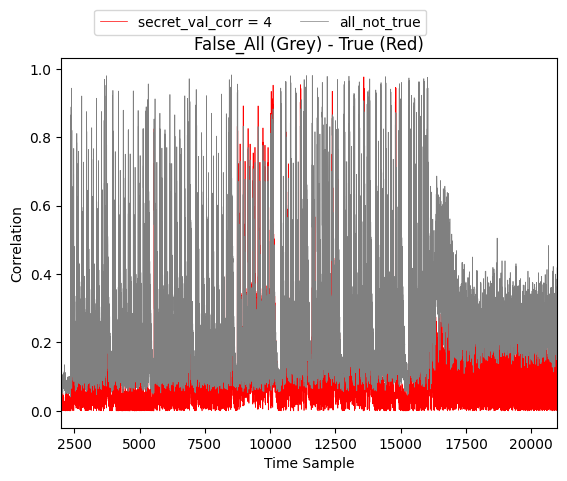

In [20]:
#prev_borders = next_borders
secrets = np.array(out)[3:-4]
print(secrets)
corr_map = abs(np.array(corr_HW8))
#akt_borders = np.array(prev_borders) + 0
for i in secrets[0:5]:
    compTrueToAll_corrMatrix(corr_map, true_secret = i, xlim=[2000, 21000], true_last = False, saveName = f'CPA_mult_level_secret[{i}]')
    #akt_borders = akt_borders + offset

### CPA

##### CPA, weight extraction - Abs8

Hello 45
Peak range: 0.3
24429
 Index of global max: 15888 and global_max_val: 0.7818506331252428


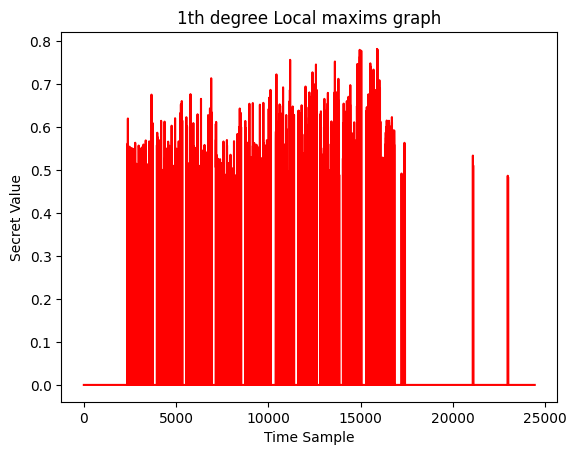

Number of uniques: 70
Number of local maxims: 792
Uniquess: [4, 1, 160, 45, 104, 90, 64, 120, 207, 60, 224, 8, 24, 48, 140, 70, 192, 16, 96, 32, 72, 41, 164, 144, 82, 128, 216, 158, 88, 176, 220, 184, 112, 226, 113, 177, 98, 196, 136, 240, 40, 101, 232, 253, 236, 182, 161, 155, 179, 78, 156, 114, 200, 228, 46, 138, 28, 14, 124, 116, 30, 126, 106, 234, 168, 212, 44, 22, 190, 66]
Local maxims: [4, 1, 1, 1, 4, 4, 160, 45, 45, 45, 45, 45, 160, 104, 104, 45, 160, 160, 160, 45, 160, 160, 160, 45, 45, 45, 160, 104, 90, 45, 160, 160, 45, 160, 160, 160, 104, 90, 160, 45, 45, 45, 90, 160, 90, 90, 4, 64, 1, 4, 4, 120, 207, 207, 207, 120, 120, 207, 207, 120, 120, 207, 207, 120, 120, 120, 207, 207, 207, 120, 207, 207, 207, 120, 207, 207, 120, 120, 120, 60, 60, 207, 60, 207, 207, 207, 207, 60, 207, 60, 60, 224, 207, 207, 8, 24, 8, 24, 4, 4, 48, 48, 140, 70, 192, 70, 16, 192, 96, 140, 70, 70, 70, 140, 48, 70, 70, 192, 70, 192, 140, 48, 70, 70, 70, 140, 48, 48, 140, 70, 24, 140, 140, 140, 140, 140, 14

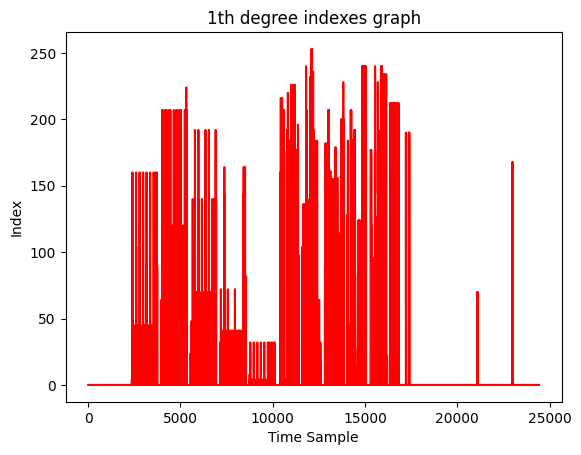

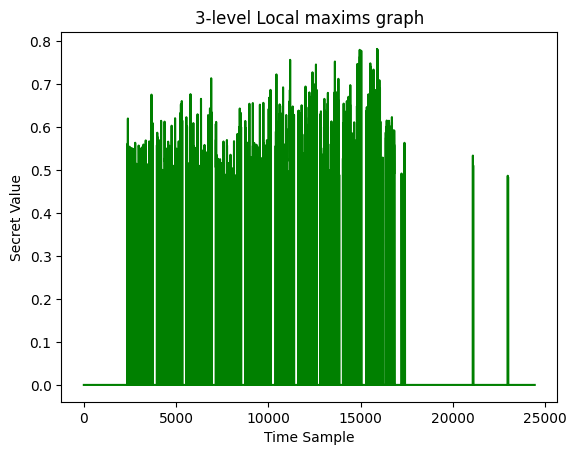

Number of uniques: 70
Number of local maxims: 927
Uniquess: [4, 1, 160, 45, 104, 90, 64, 120, 207, 60, 224, 8, 24, 48, 140, 70, 192, 16, 96, 32, 72, 41, 164, 144, 82, 128, 216, 158, 88, 176, 220, 184, 112, 226, 113, 196, 177, 98, 136, 240, 40, 101, 232, 253, 236, 182, 161, 155, 179, 78, 156, 114, 200, 228, 46, 138, 28, 14, 124, 116, 30, 126, 106, 234, 168, 212, 44, 22, 190, 66]
Local maxims: [4, 1, 1, 1, 4, 4, 160, 45, 45, 45, 45, 45, 160, 104, 104, 45, 160, 160, 160, 45, 160, 160, 160, 45, 45, 45, 160, 104, 90, 45, 160, 160, 160, 45, 160, 160, 160, 104, 90, 160, 45, 45, 45, 90, 45, 90, 160, 90, 90, 4, 64, 1, 4, 4, 120, 207, 207, 207, 207, 120, 120, 207, 207, 120, 120, 120, 207, 207, 120, 120, 120, 207, 207, 207, 120, 207, 207, 120, 207, 120, 207, 207, 120, 120, 120, 60, 60, 207, 60, 207, 207, 207, 207, 60, 207, 60, 60, 224, 207, 207, 8, 24, 8, 4, 24, 4, 4, 48, 48, 140, 70, 192, 192, 70, 16, 192, 96, 140, 70, 70, 70, 140, 48, 70, 70, 192, 192, 70, 192, 140, 48, 70, 70, 70, 140, 48, 48,

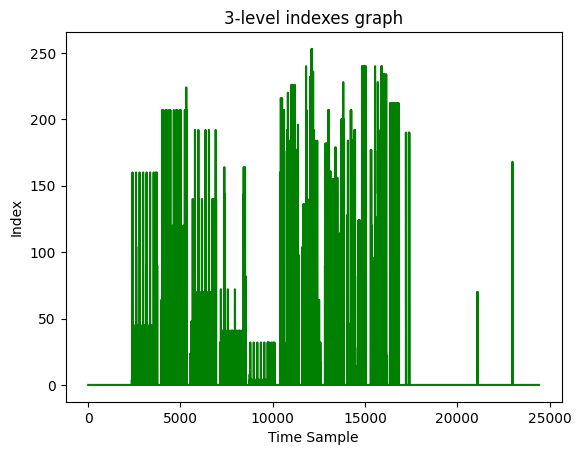

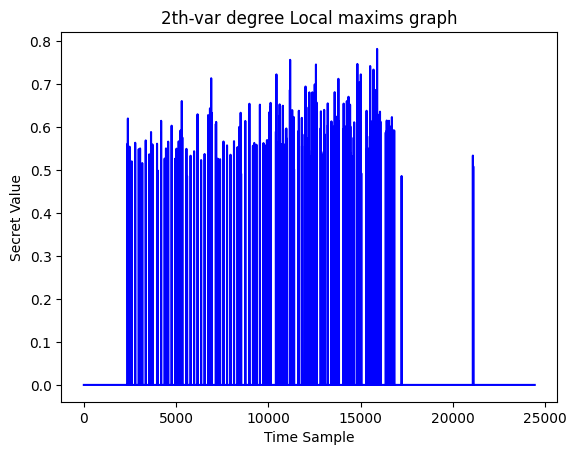

Number of uniques: 50
Number of local maxims: 191
Uniquess: [1, 4, 45, 104, 160, 90, 207, 120, 60, 8, 48, 192, 96, 70, 140, 24, 41, 144, 72, 32, 164, 82, 16, 216, 220, 226, 177, 98, 136, 40, 232, 253, 184, 64, 182, 112, 78, 114, 200, 46, 124, 240, 224, 30, 126, 106, 234, 44, 212, 66]
Local maxims: [1, 4, 45, 45, 104, 160, 160, 45, 104, 160, 160, 90, 45, 160, 90, 1, 207, 120, 120, 207, 120, 207, 207, 207, 120, 60, 207, 60, 60, 207, 8, 48, 192, 96, 70, 192, 140, 70, 24, 140, 140, 140, 140, 1, 4, 41, 144, 72, 32, 72, 32, 32, 164, 82, 164, 82, 4, 32, 32, 4, 32, 4, 4, 4, 32, 16, 4, 4, 8, 4, 45, 45, 216, 207, 207, 4, 4, 70, 70, 220, 82, 164, 226, 4, 4, 177, 177, 98, 98, 98, 45, 45, 136, 207, 207, 40, 140, 70, 232, 253, 72, 41, 184, 184, 4, 4, 16, 64, 16, 16, 16, 16, 90, 45, 96, 182, 207, 207, 70, 70, 41, 82, 112, 78, 4, 4, 114, 200, 114, 114, 200, 200, 90, 90, 46, 207, 207, 184, 184, 70, 70, 112, 41, 72, 124, 4, 4, 240, 240, 224, 240, 224, 177, 177, 30, 60, 16, 16, 240, 126, 126, 144, 114, 1

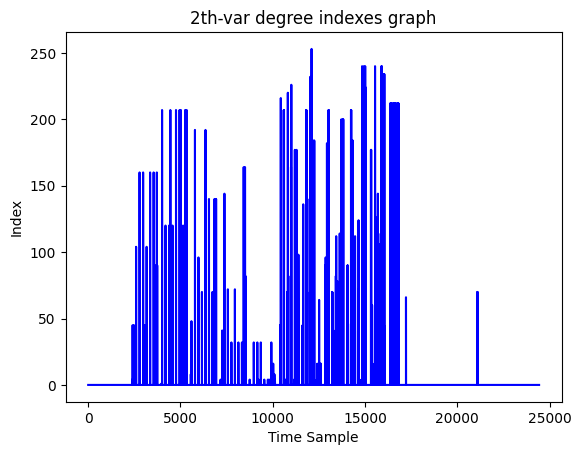

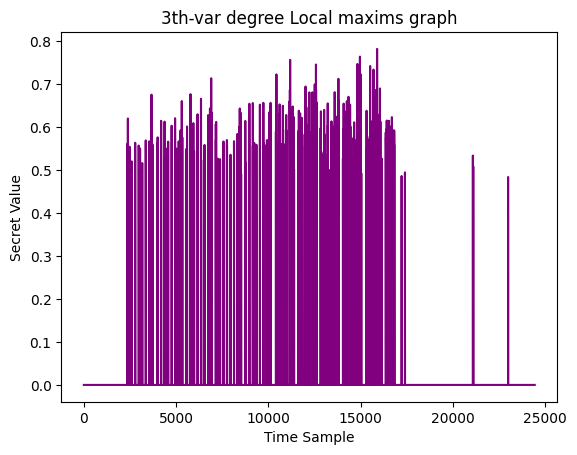

Number of uniques: 57
Number of local maxims: 415
Uniquess: [1, 4, 45, 104, 160, 90, 120, 207, 60, 8, 48, 70, 192, 16, 96, 140, 24, 32, 41, 144, 72, 164, 82, 216, 158, 220, 226, 113, 64, 177, 98, 136, 40, 232, 253, 184, 182, 161, 155, 112, 78, 114, 200, 46, 28, 124, 240, 224, 30, 126, 106, 234, 168, 44, 212, 66, 190]
Local maxims: [1, 1, 4, 45, 45, 45, 104, 104, 160, 160, 160, 160, 160, 45, 104, 90, 160, 160, 160, 160, 90, 160, 45, 45, 160, 90, 1, 4, 120, 207, 120, 120, 207, 120, 120, 207, 120, 120, 207, 120, 207, 207, 120, 207, 120, 120, 60, 207, 60, 207, 60, 60, 60, 207, 8, 4, 48, 48, 70, 192, 16, 96, 140, 70, 140, 48, 70, 192, 192, 140, 48, 70, 140, 48, 24, 140, 140, 140, 140, 192, 140, 140, 1, 32, 32, 4, 41, 144, 72, 41, 32, 72, 72, 32, 41, 32, 164, 32, 82, 82, 164, 32, 82, 8, 4, 4, 32, 32, 4, 32, 32, 4, 32, 32, 4, 32, 4, 4, 32, 4, 32, 32, 32, 4, 16, 4, 4, 8, 32, 4, 45, 45, 216, 216, 60, 158, 207, 207, 4, 4, 4, 192, 70, 70, 140, 70, 220, 220, 82, 82, 72, 72, 164, 226, 113, 4, 64, 4

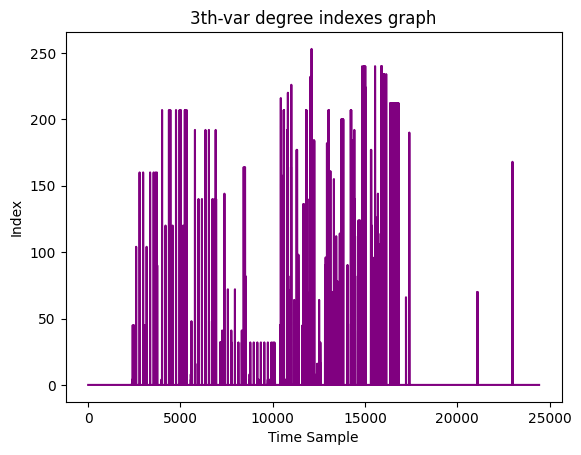

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 2375, with correlation secret_corr = 0.562


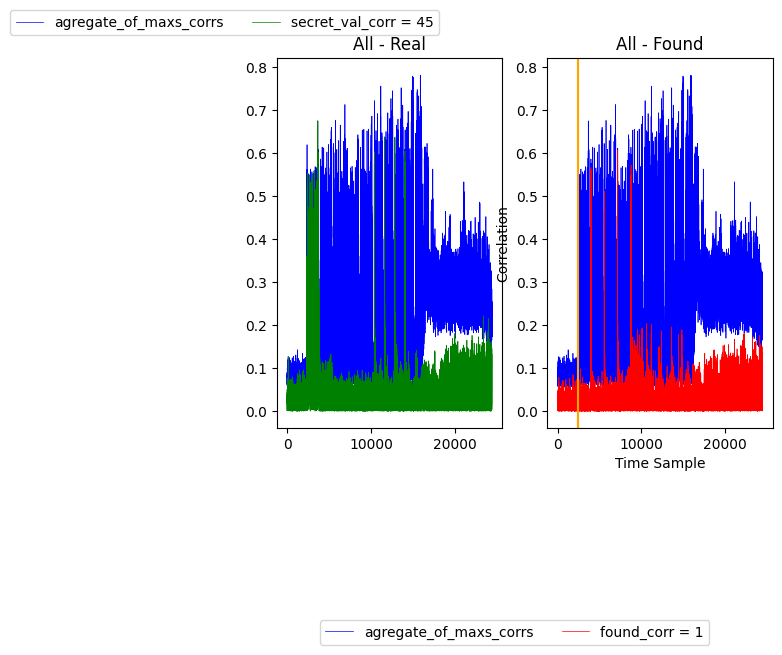

Hello 207
In range 2381 - 24429
 Found the soonest secret value is 4, at the time sample 2387, with correlation secret_corr = 0.620


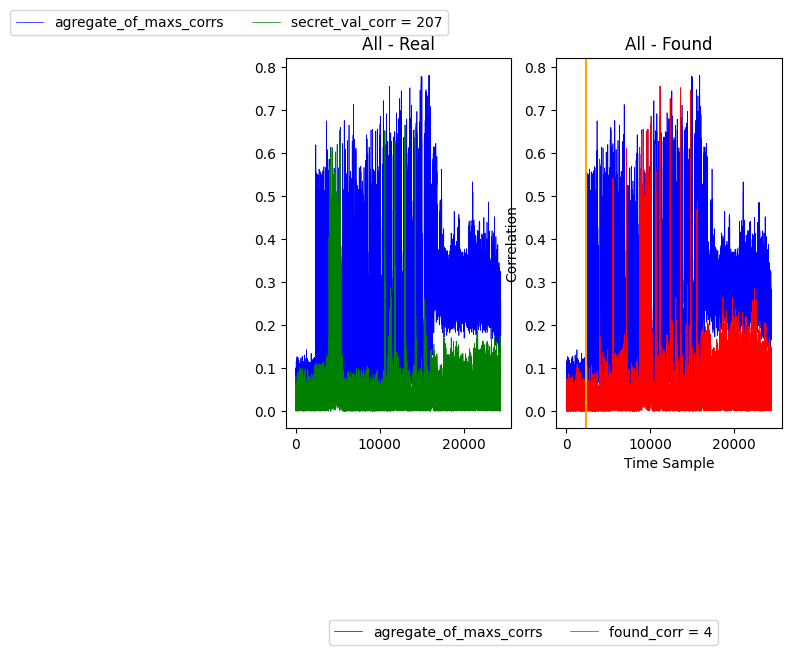

Hello 70
In range 2396 - 24429
 Found the soonest secret value is 45, at the time sample 2406, with correlation secret_corr = 0.524


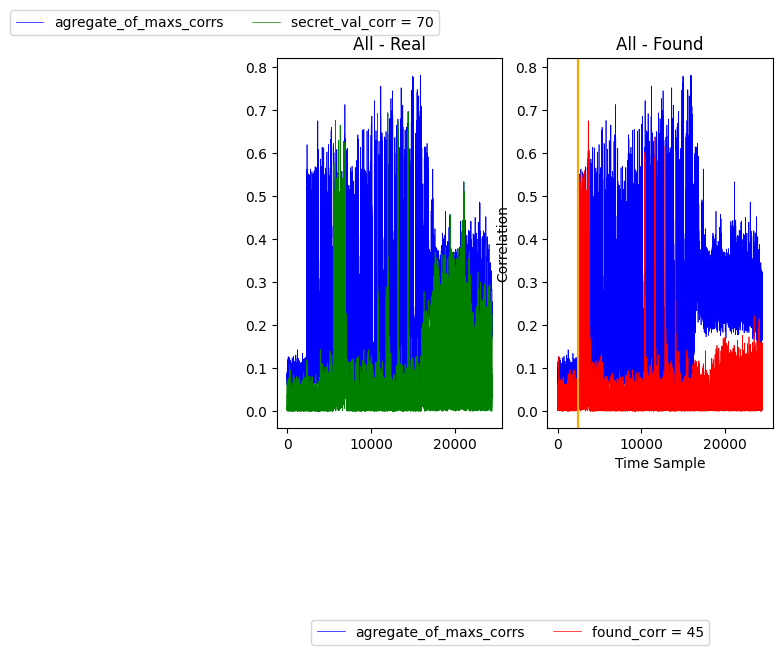

Hello 41
In range 2441 - 24429
 Found the soonest secret value is 45, at the time sample 2477, with correlation secret_corr = 0.554


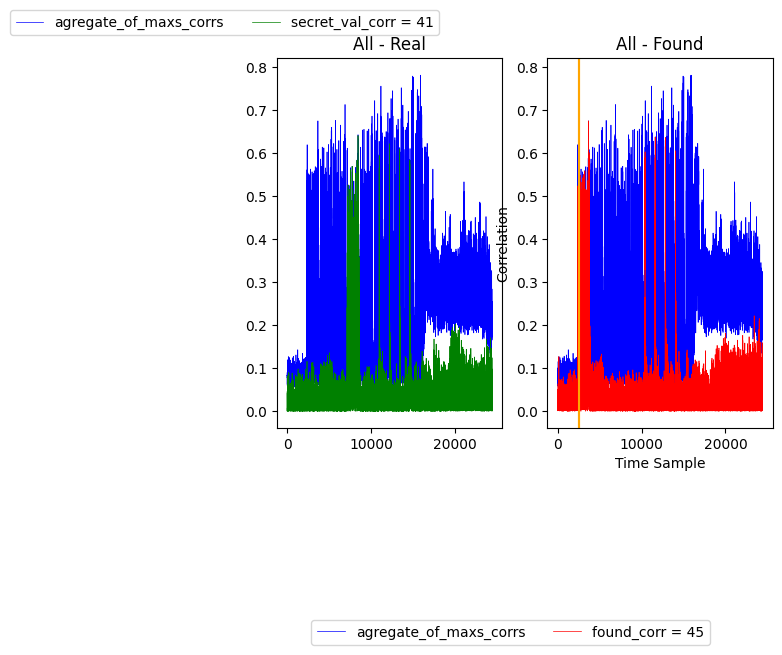

Hello 4
In range 2536 - 24429
 Found the soonest secret value is 104, at the time sample 2595, with correlation secret_corr = 0.520


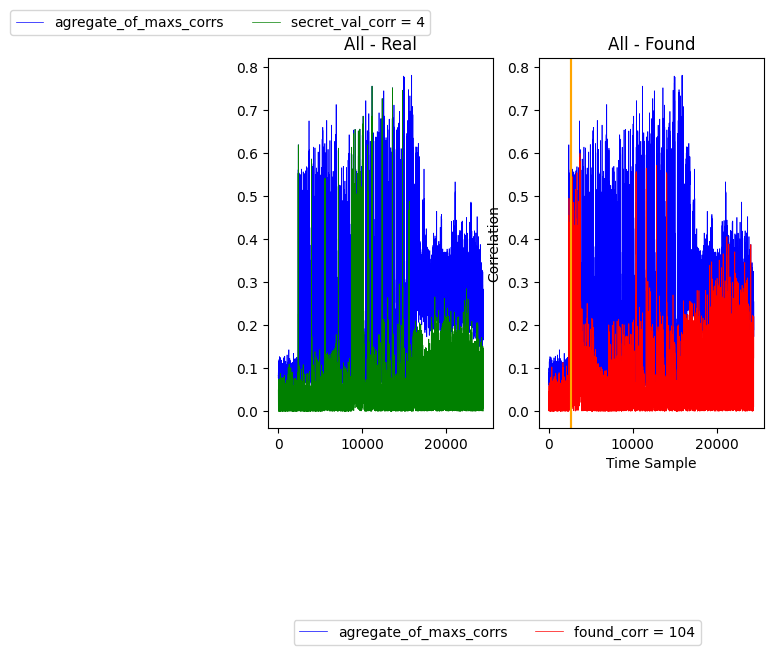

Hello 0
In range 2689 - 24429
 Found the soonest secret value is 160, at the time sample 2783, with correlation secret_corr = 0.563


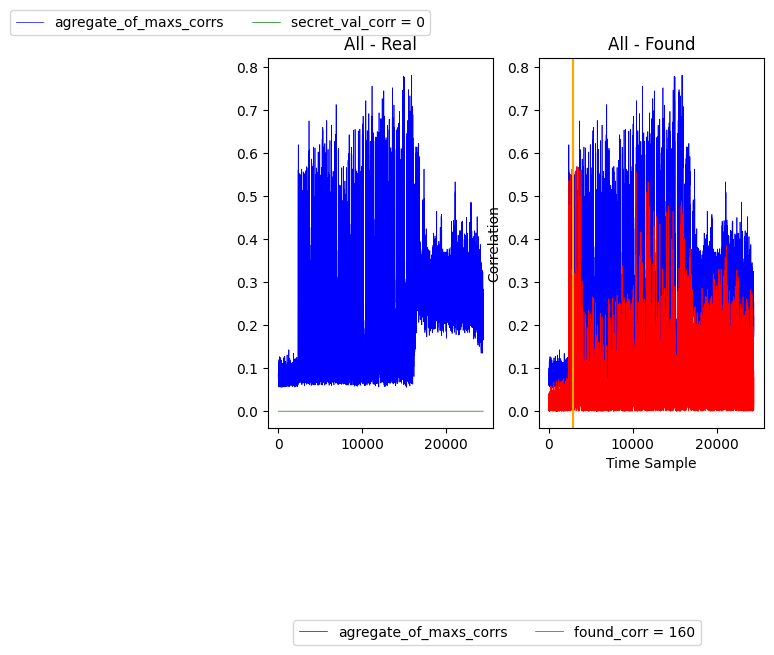

Hello 180
In range 2879 - 24429
 Found the soonest secret value is 160, at the time sample 2975, with correlation secret_corr = 0.549


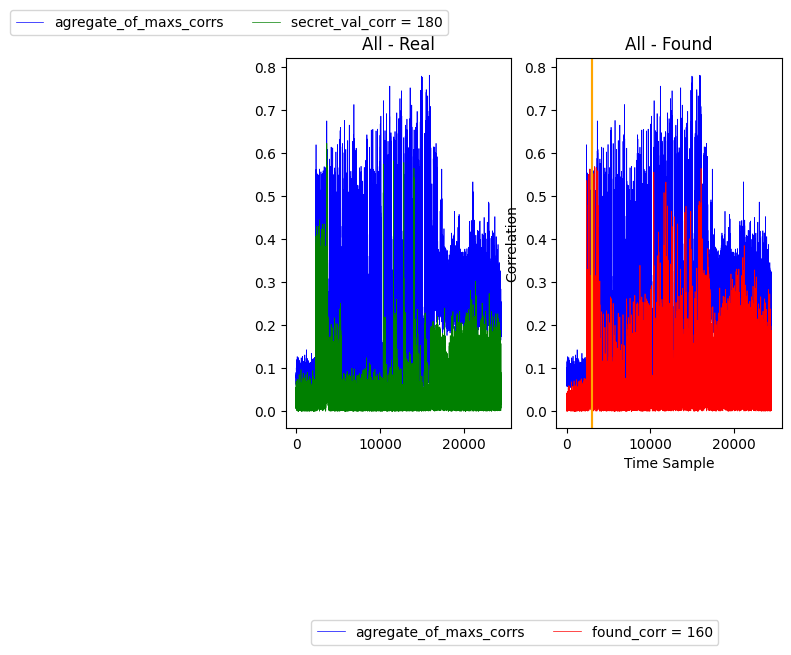

Hello 120
In range 3011 - 24429
 Found the soonest secret value is 45, at the time sample 3047, with correlation secret_corr = 0.550


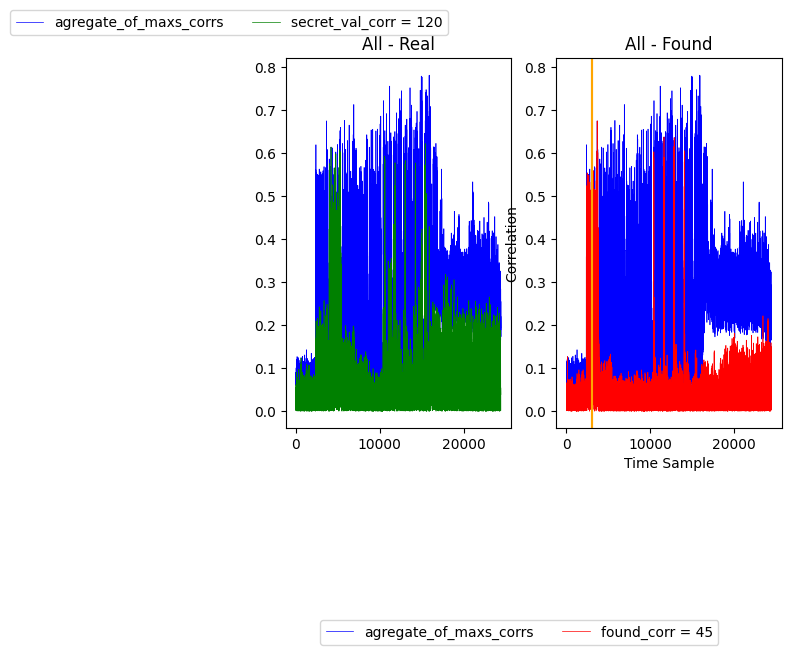

Hello 216
In range 3106 - 24429
 Found the soonest secret value is 104, at the time sample 3165, with correlation secret_corr = 0.516


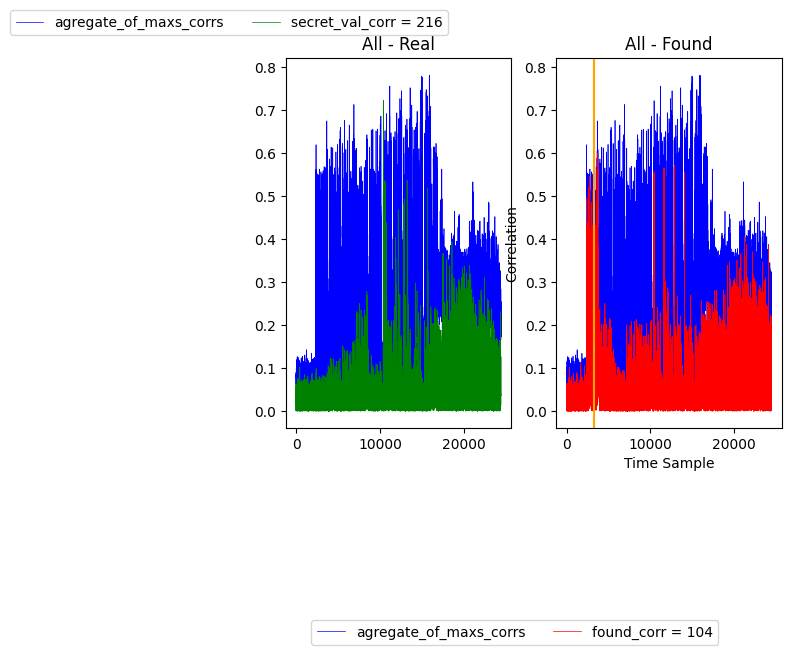

Hello 104
In range 3260 - 24429
 Found the soonest secret value is 160, at the time sample 3354, with correlation secret_corr = 0.569


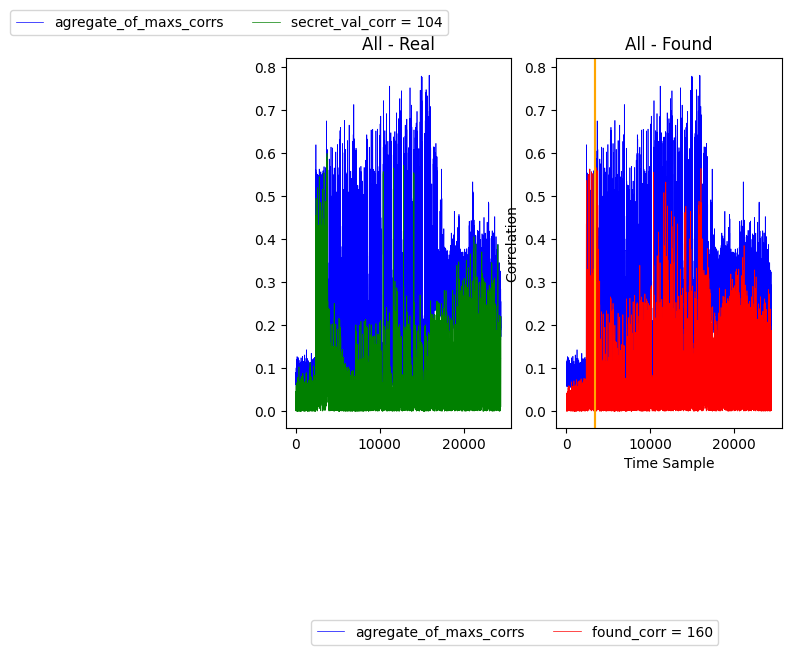

Hello 167
In range 3449 - 24429
 Found the soonest secret value is 160, at the time sample 3545, with correlation secret_corr = 0.537


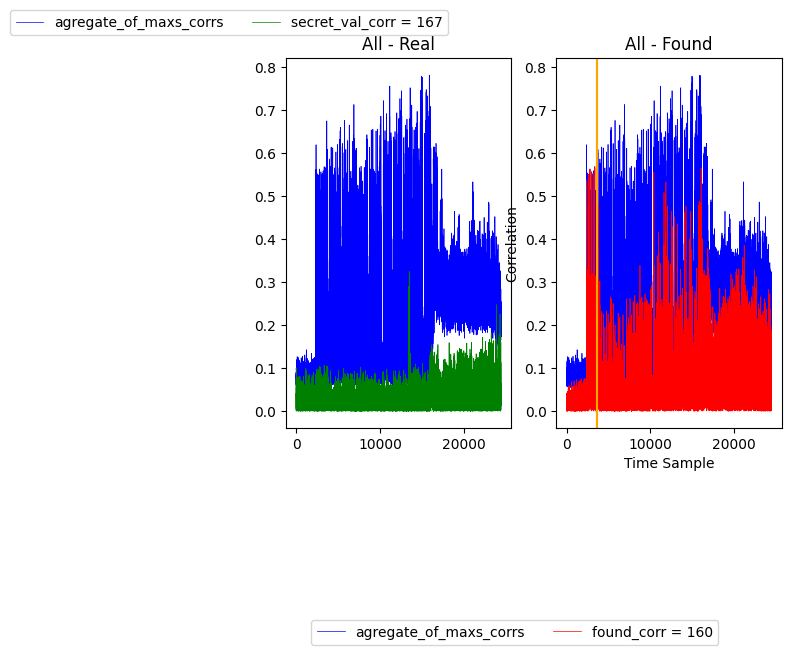

Hello 0
In range 3593 - 24429
 Found the soonest secret value is 90, at the time sample 3641, with correlation secret_corr = 0.589


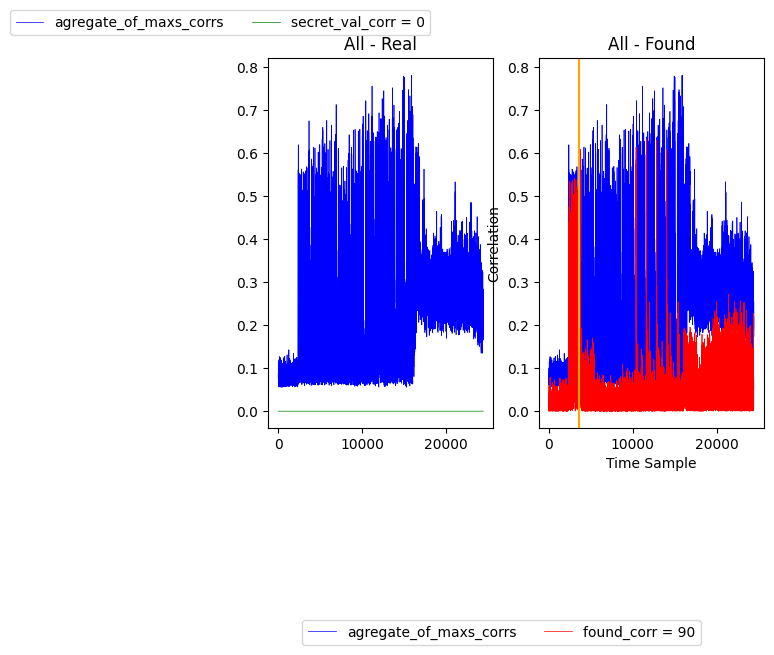

In [21]:
corr_map = abs(np.array(corr_Abs8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs8_{firmwareName}')

##### CPA, weight extraction - Abs32

Hello 45
Peak range: 0.3
24429
 Index of global max: 7150 and global_max_val: 0.607242155780833


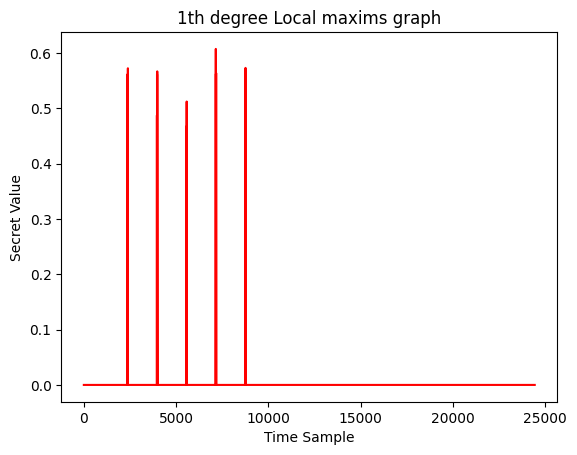

Number of uniques: 26
Number of local maxims: 42
Uniquess: [47, 55, 61, 175, 193, 85, 127, 103, 9, 111, 69, 67, 17, 177, 35, 241, 75, 31, 21, 7, 95, 15, 27, 5, 23, 179]
Local maxims: [47, 55, 61, 175, 193, 85, 127, 103, 9, 175, 175, 111, 69, 67, 175, 17, 177, 35, 241, 85, 111, 75, 85, 31, 21, 7, 95, 127, 15, 31, 47, 27, 31, 175, 5, 17, 21, 23, 9, 179, 111, 35]


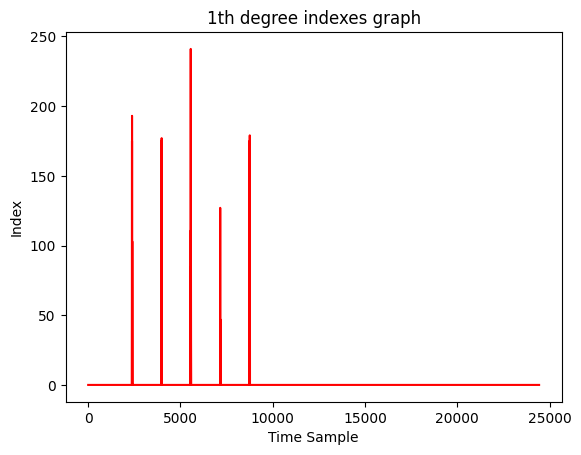

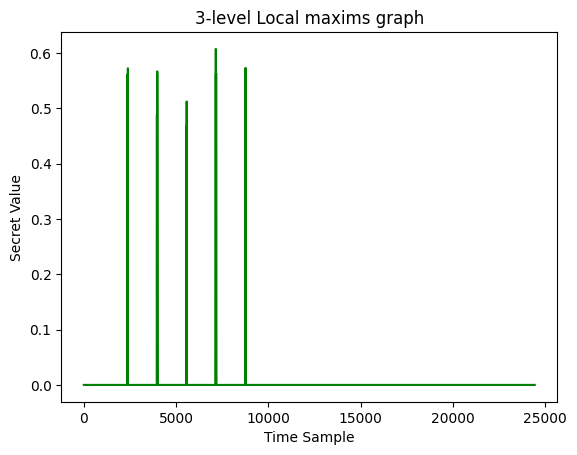

Number of uniques: 31
Number of local maxims: 54
Uniquess: [47, 55, 61, 165, 175, 13, 193, 85, 127, 103, 9, 1, 111, 21, 69, 67, 35, 17, 177, 241, 75, 31, 7, 95, 5, 15, 27, 169, 3, 23, 179]
Local maxims: [47, 55, 61, 165, 175, 13, 193, 85, 127, 103, 9, 175, 175, 1, 111, 21, 69, 67, 35, 175, 17, 177, 35, 241, 85, 111, 75, 85, 31, 21, 7, 95, 127, 35, 5, 15, 15, 31, 47, 27, 31, 175, 5, 169, 3, 17, 15, 35, 21, 23, 9, 179, 111, 35]


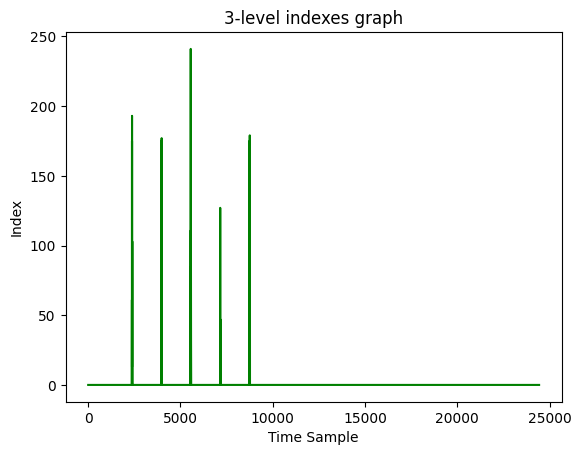

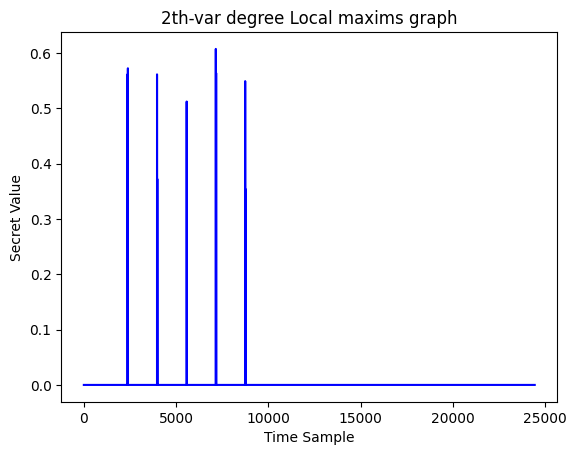

Number of uniques: 8
Number of local maxims: 9
Uniquess: [193, 9, 69, 177, 31, 95, 5, 35]
Local maxims: [193, 9, 69, 177, 31, 95, 31, 5, 35]


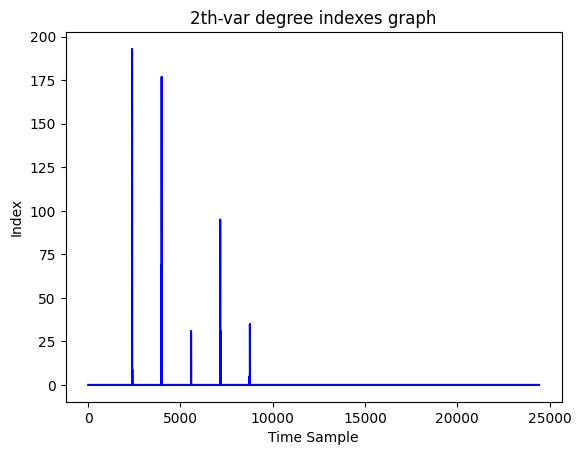

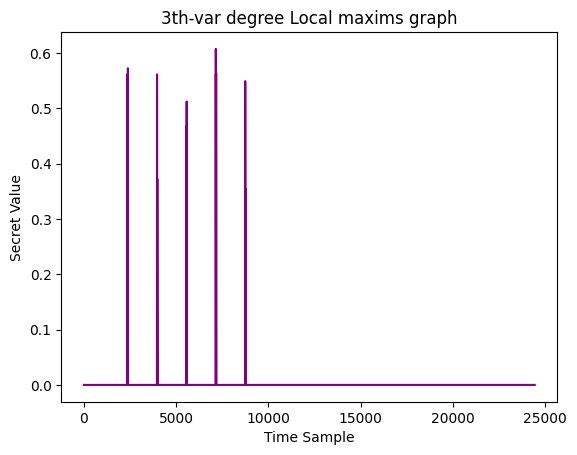

Number of uniques: 16
Number of local maxims: 21
Uniquess: [55, 193, 9, 175, 69, 67, 177, 111, 75, 31, 21, 95, 5, 23, 179, 35]
Local maxims: [55, 193, 9, 175, 69, 67, 175, 177, 111, 75, 31, 21, 95, 31, 31, 5, 21, 23, 9, 179, 35]


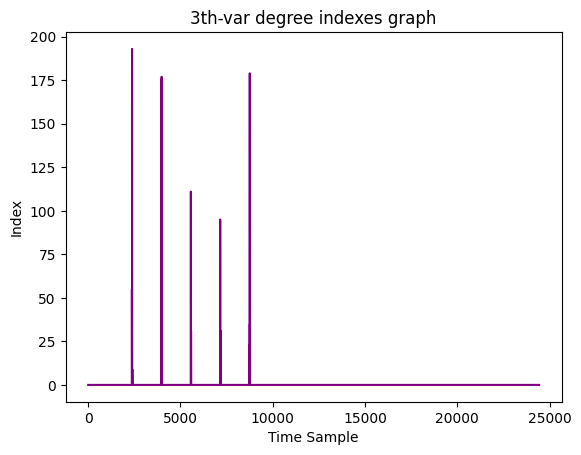

In range 0 - 24429
 Found the soonest secret value is 193, at the time sample 2375, with correlation secret_corr = 0.562


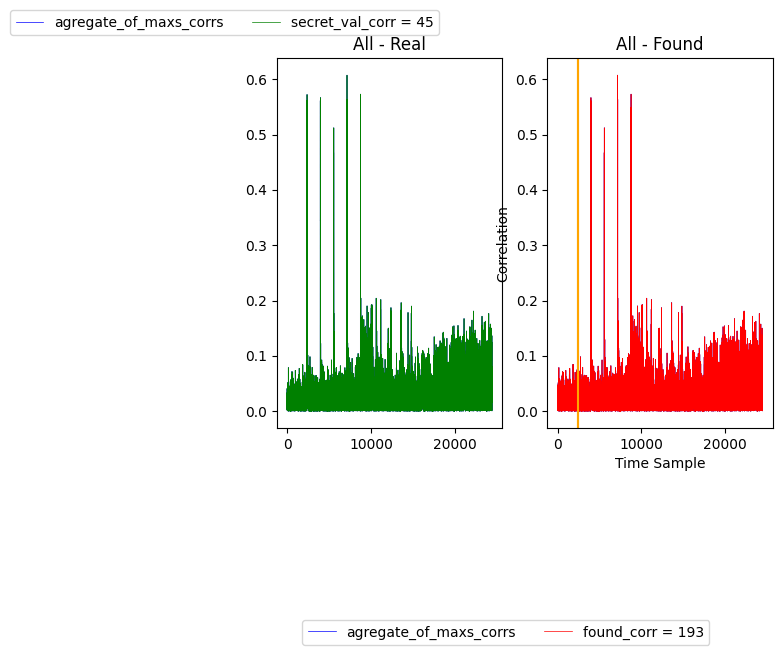

Hello 207
In range 2381 - 24429
 Found the soonest secret value is 9, at the time sample 2387, with correlation secret_corr = 0.572


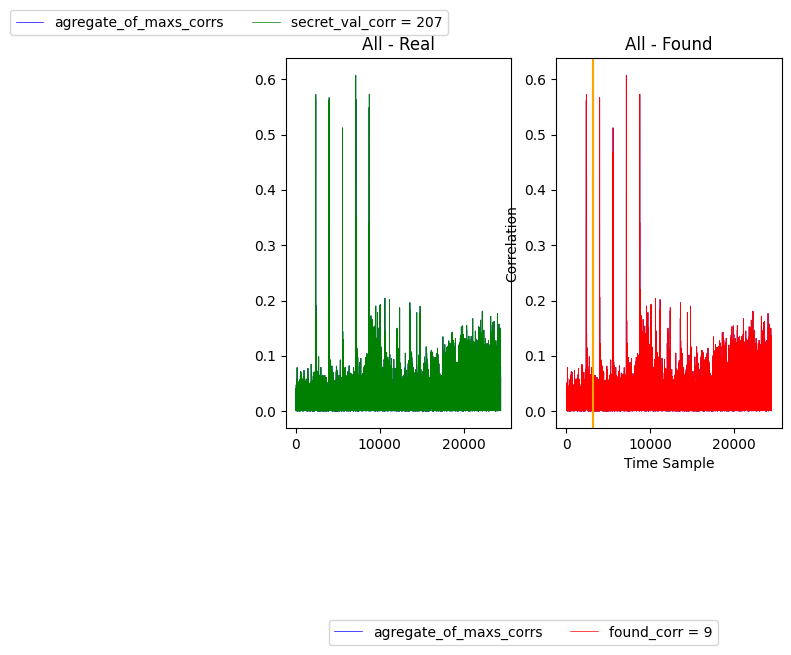

Hello 70
In range 3176 - 24429
 Found the soonest secret value is 69, at the time sample 3966, with correlation secret_corr = 0.561


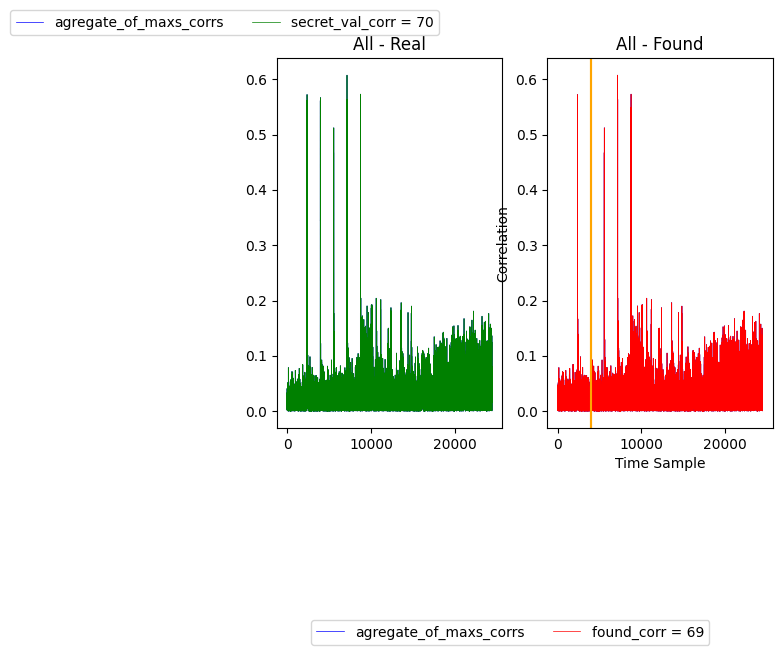

Hello 41
In range 3973 - 24429
 Found the soonest secret value is 177, at the time sample 3979, with correlation secret_corr = 0.372


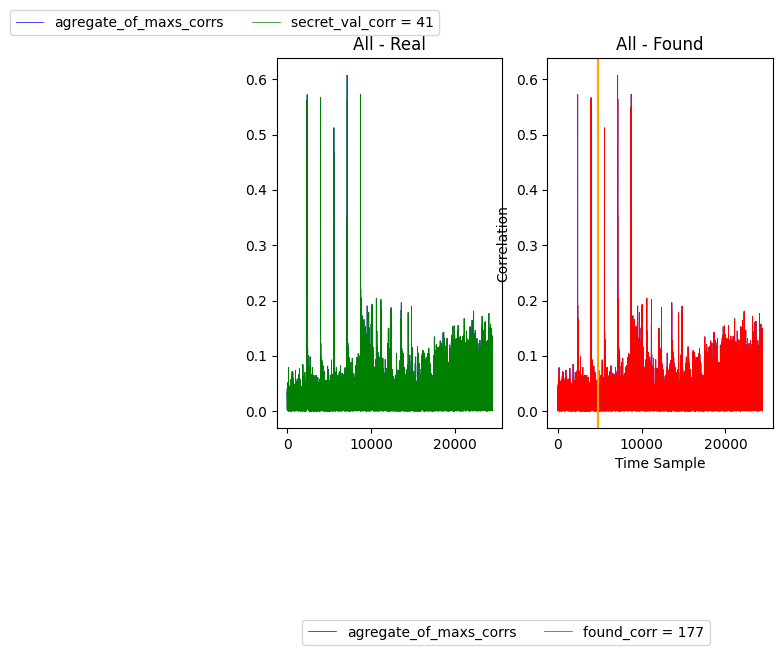

Hello 4
In range 4776 - 24429
 Found the soonest secret value is 31, at the time sample 5572, with correlation secret_corr = 0.512


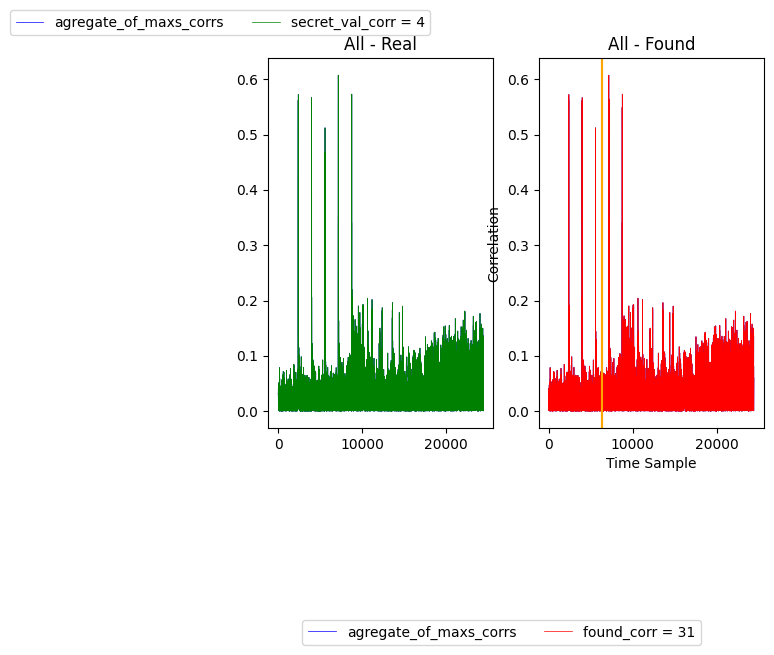

Hello 0
In range 6361 - 24429
 Found the soonest secret value is 95, at the time sample 7150, with correlation secret_corr = 0.607


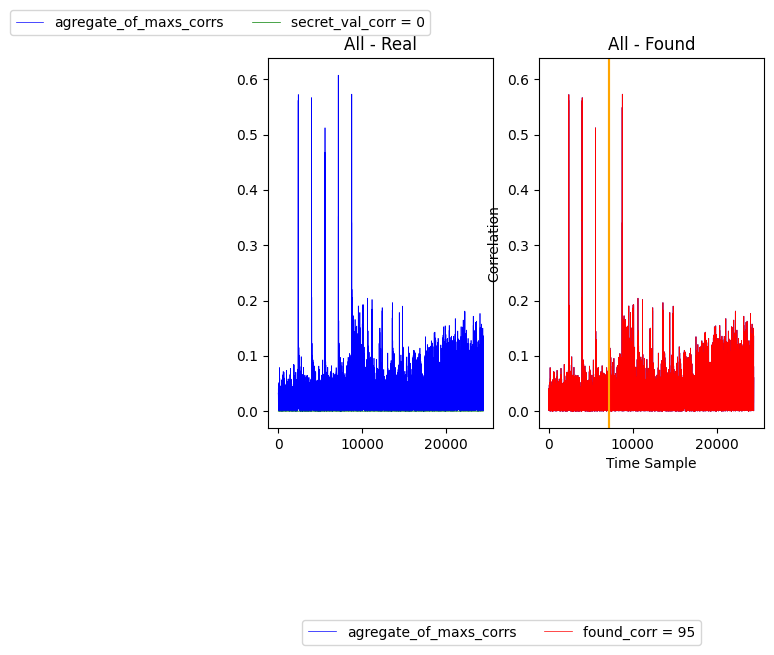

Hello 180
In range 7159 - 24429
 Found the soonest secret value is 31, at the time sample 7169, with correlation secret_corr = 0.564


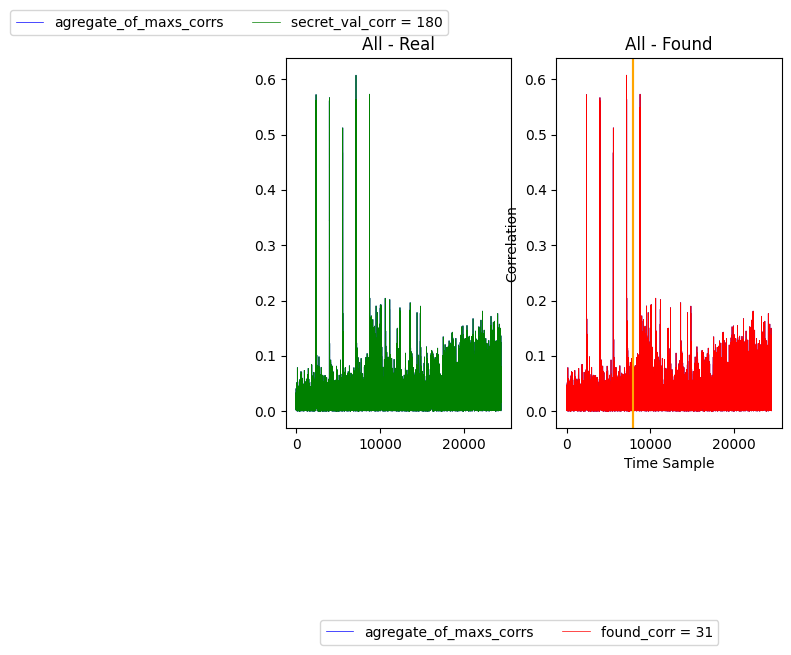

Hello 120
In range 7956 - 24429
 Found the soonest secret value is 5, at the time sample 8742, with correlation secret_corr = 0.549


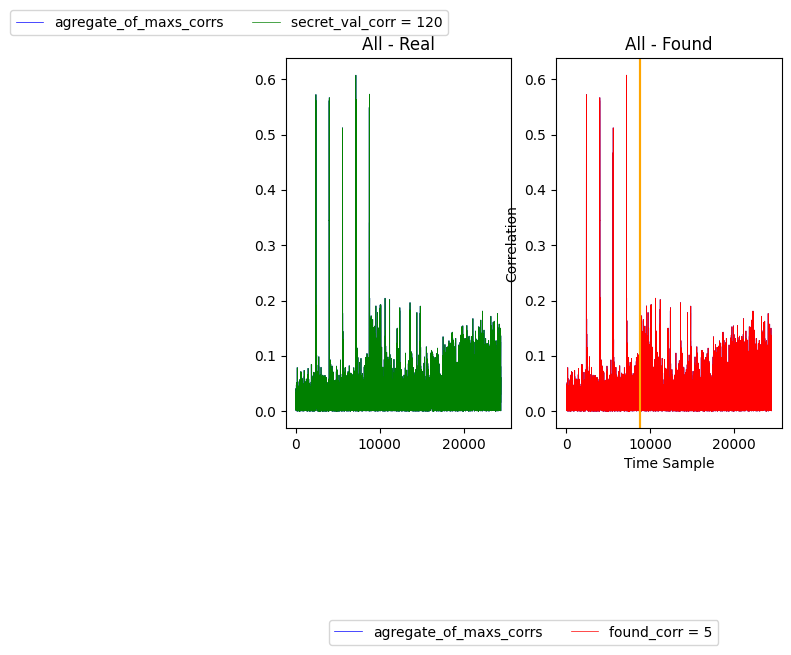

Hello 216
In range 8751 - 24429
 Found the soonest secret value is 35, at the time sample 8761, with correlation secret_corr = 0.354


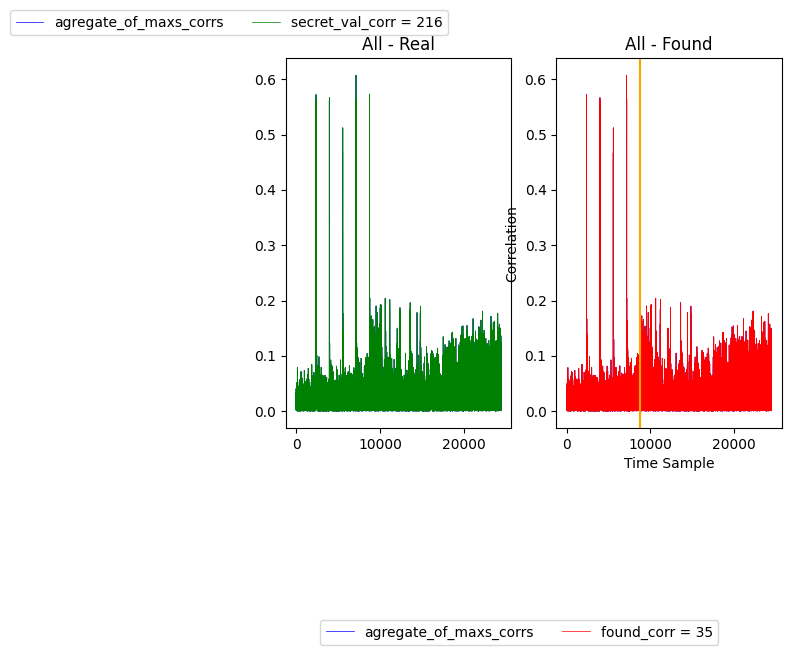

Hello 104
In range 8751 - 24429
 Found the soonest secret value is 35, at the time sample 8761, with correlation secret_corr = 0.354


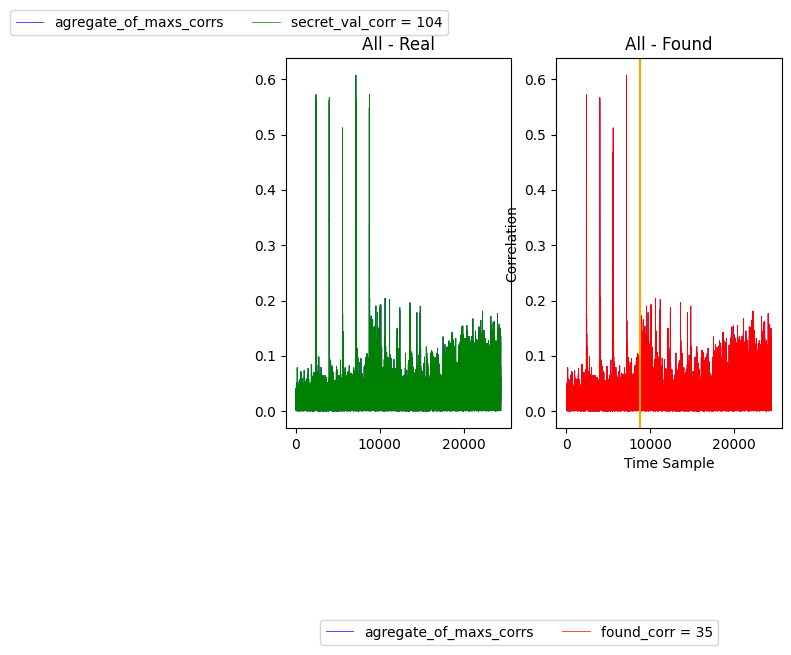

Hello 167
In range 8751 - 24429
 Found the soonest secret value is 35, at the time sample 8761, with correlation secret_corr = 0.354


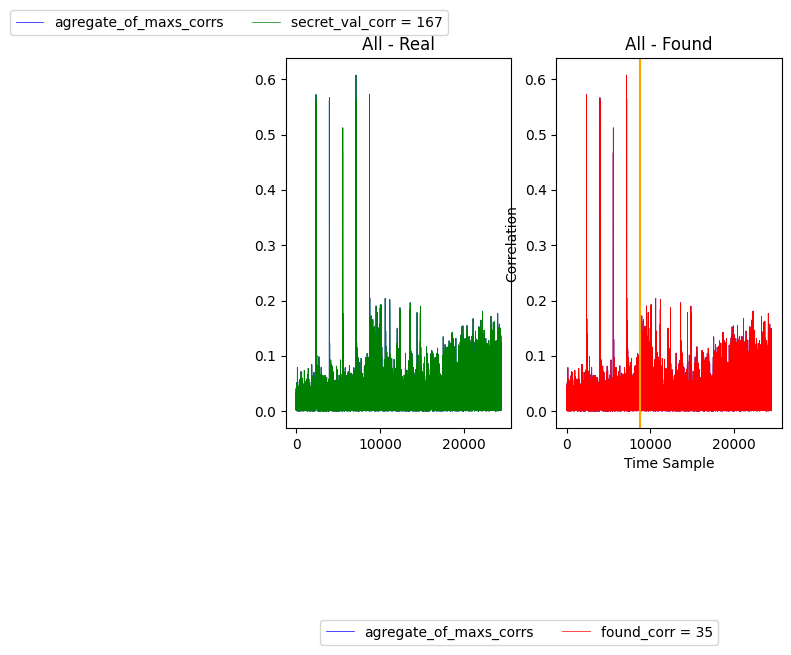

Hello 0
In range 8751 - 24429
 Found the soonest secret value is 35, at the time sample 8761, with correlation secret_corr = 0.354


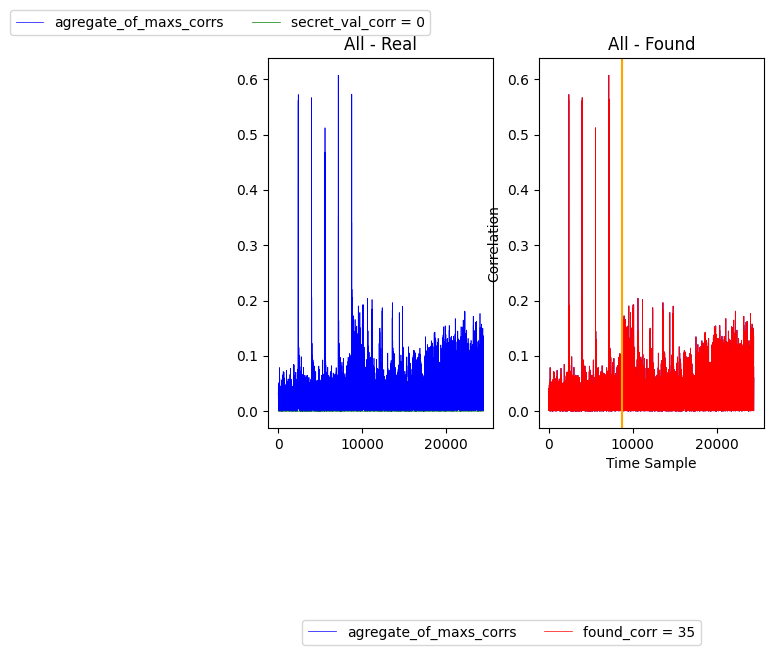

In [22]:
corr_map = abs(np.array(corr_Abs32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs32_{firmwareName}')

##### CPA, weight extraction - HW32

Hello 45
Peak range: 0.3
24429
 Index of global max: 8748 and global_max_val: 0.9550293709096475


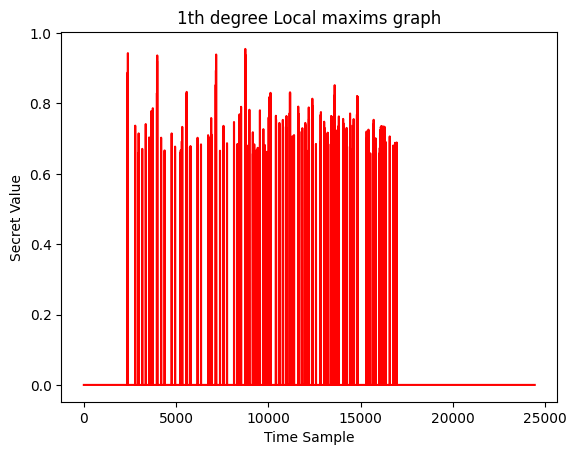

Number of uniques: 18
Number of local maxims: 360
Uniquess: [1, 45, 207, 129, 35, 41, 11, 113, 177, 101, 155, 57, 23, 7, 15, 53, 245, 255]
Local maxims: [1, 45, 45, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 207, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 129, 35, 1, 35, 1, 1, 1, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 1, 41, 41, 1, 1, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 207, 11, 207, 207, 207, 207, 1, 35, 35, 35, 41, 41, 41, 41, 113, 1, 1, 1, 1, 129, 129, 113, 177, 177, 177, 177, 45, 45, 45, 45, 45, 207, 207, 207, 207, 101, 35, 35, 35, 35, 35, 35, 41, 41, 41, 41, 1, 1, 1, 129, 129, 1, 45, 45, 45, 45, 45, 207, 207, 207, 35, 35, 35, 35, 35, 155, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 129, 129, 57, 57, 57, 57, 57, 57, 57, 57, 45, 45, 45, 45, 45, 23, 207, 207, 207, 207, 35, 35, 35, 35, 7, 41, 41, 41, 41, 

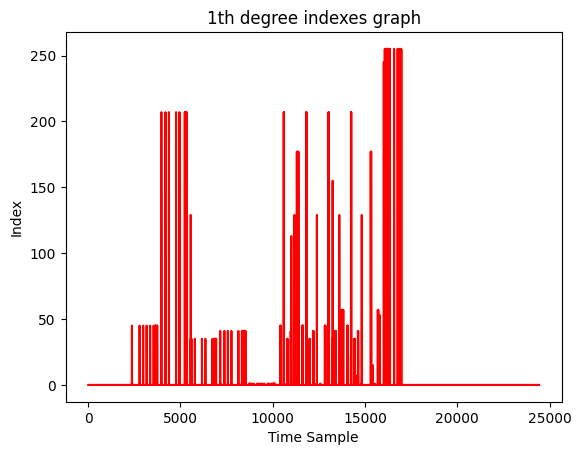

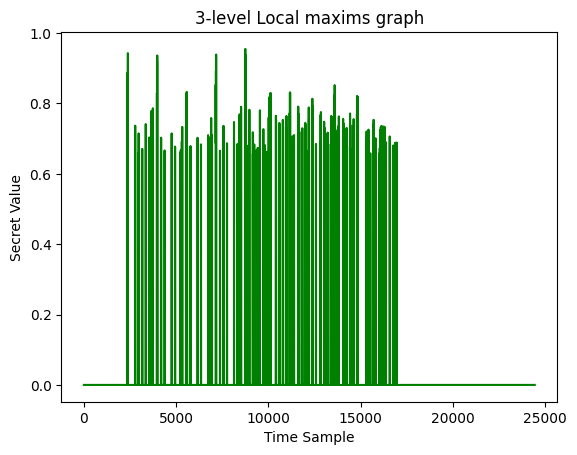

Number of uniques: 18
Number of local maxims: 422
Uniquess: [1, 45, 207, 129, 35, 41, 11, 113, 177, 101, 155, 57, 23, 7, 15, 53, 245, 255]
Local maxims: [1, 45, 45, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 207, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 129, 35, 35, 1, 35, 1, 1, 1, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 1, 1, 41, 1, 41, 1, 1, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 207, 207, 207, 11, 207, 207, 207, 207, 1, 35, 35, 35, 41, 41, 41, 41, 113, 1, 1, 1, 1, 129, 129, 113, 177, 177, 177, 177, 45, 45, 45, 45, 45, 207, 207, 207, 207, 101, 35, 35, 35, 35, 35, 35, 35, 35, 41, 41, 41, 41, 1, 1, 1, 129, 129, 1, 45, 45, 45, 45, 45, 207, 207, 207, 35, 35, 35, 35, 35, 155, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 129, 129, 57, 57, 57, 57, 57, 57, 57, 57, 45, 45, 45, 45, 45

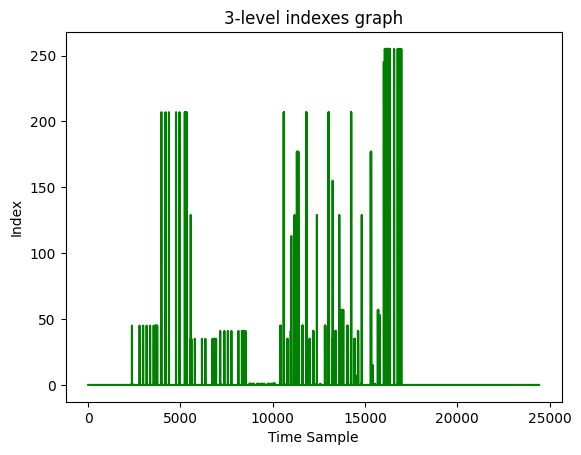

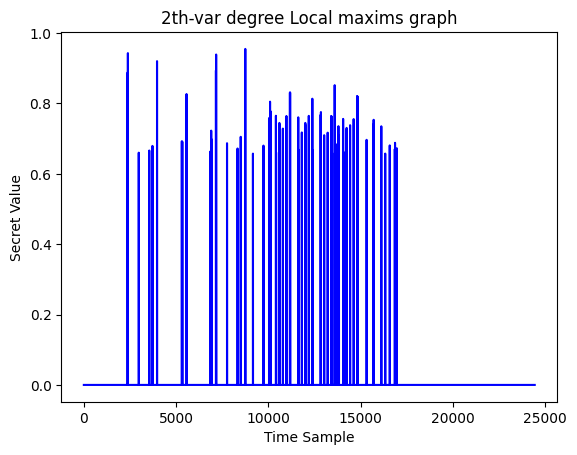

Number of uniques: 9
Number of local maxims: 68
Uniquess: [1, 45, 207, 35, 41, 129, 57, 177, 255]
Local maxims: [1, 1, 45, 45, 45, 1, 207, 207, 1, 35, 35, 35, 1, 1, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 45, 45, 207, 207, 35, 41, 1, 129, 45, 45, 207, 35, 35, 41, 1, 129, 45, 45, 207, 35, 41, 41, 1, 129, 57, 57, 57, 45, 45, 207, 207, 35, 41, 1, 129, 177, 57, 57, 255, 255, 255, 255, 255, 255]


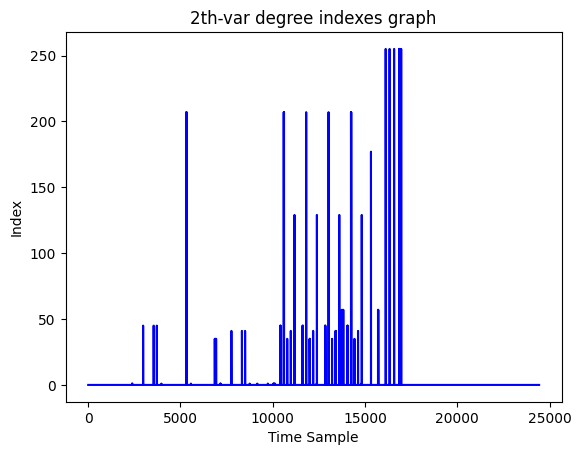

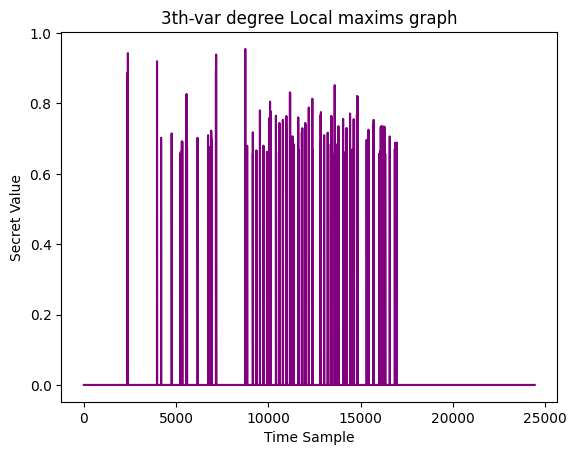

Number of uniques: 15
Number of local maxims: 163
Uniquess: [1, 207, 35, 45, 41, 113, 129, 177, 101, 155, 57, 7, 15, 245, 255]
Local maxims: [1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 1, 35, 1, 35, 35, 35, 35, 35, 35, 35, 35, 35, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 207, 207, 35, 35, 41, 41, 113, 1, 129, 177, 177, 45, 45, 45, 207, 101, 35, 35, 41, 41, 1, 1, 129, 45, 45, 45, 207, 35, 35, 155, 41, 41, 1, 1, 1, 129, 57, 57, 57, 45, 45, 207, 207, 35, 35, 7, 41, 41, 1, 1, 129, 177, 15, 57, 57, 57, 245, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


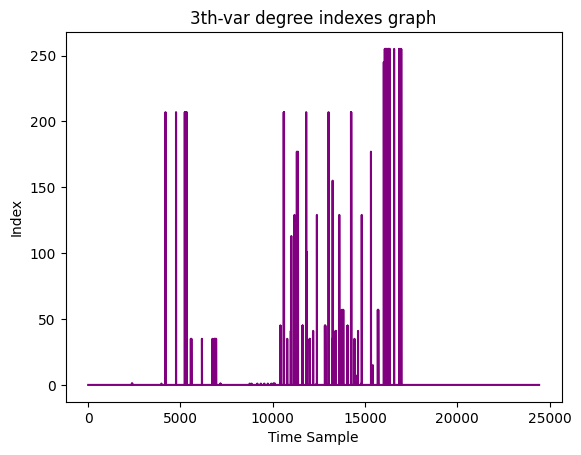

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 2375, with correlation secret_corr = 0.888


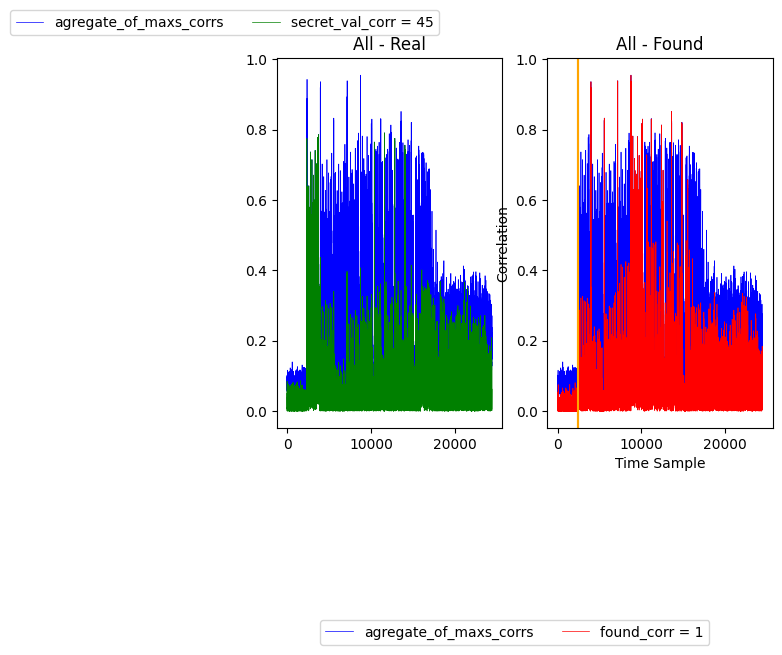

Hello 207
In range 2381 - 24429
 Found the soonest secret value is 1, at the time sample 2387, with correlation secret_corr = 0.943


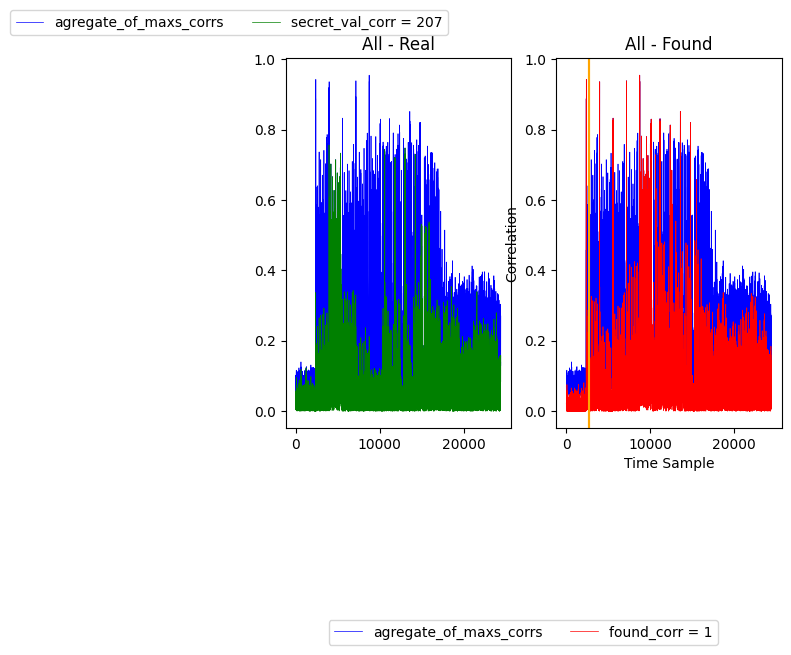

Hello 70
In range 2682 - 24429
 Found the soonest secret value is 45, at the time sample 2976, with correlation secret_corr = 0.660


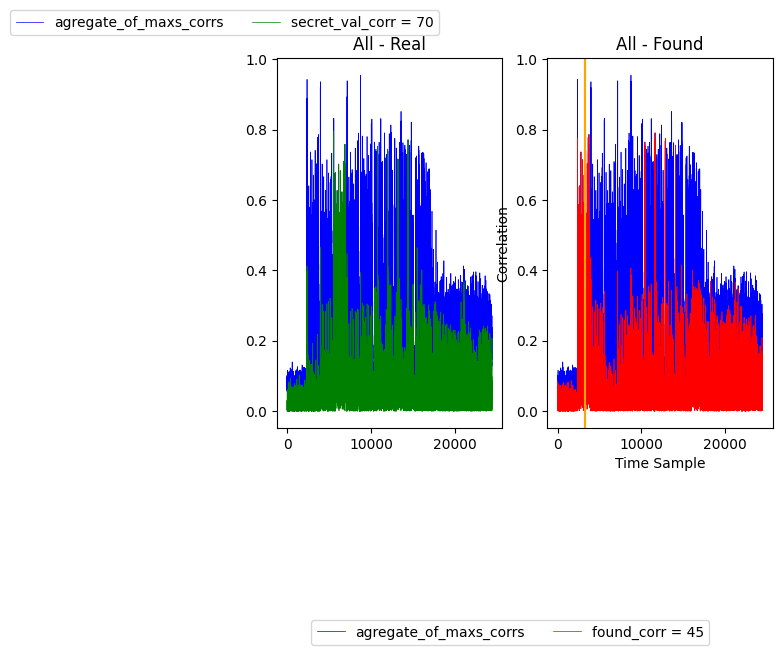

Hello 41
In range 3261 - 24429
 Found the soonest secret value is 45, at the time sample 3546, with correlation secret_corr = 0.666


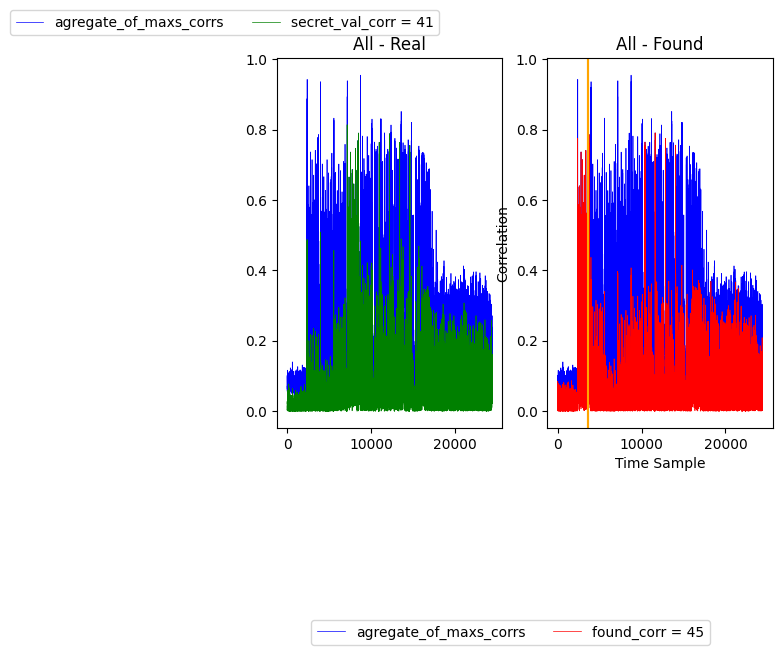

Hello 4
In range 3632 - 24429
 Found the soonest secret value is 45, at the time sample 3718, with correlation secret_corr = 0.679


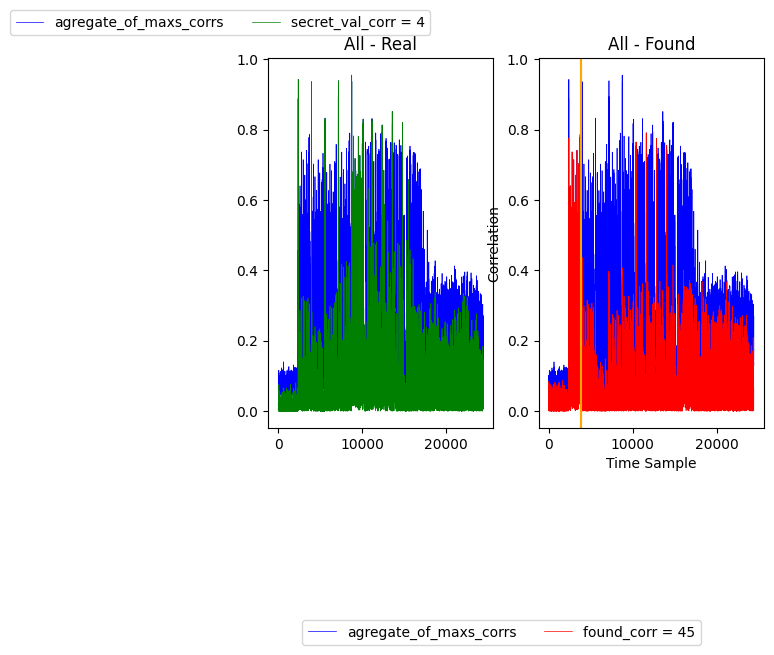

Hello 0
In range 3842 - 24429
 Found the soonest secret value is 1, at the time sample 3966, with correlation secret_corr = 0.920


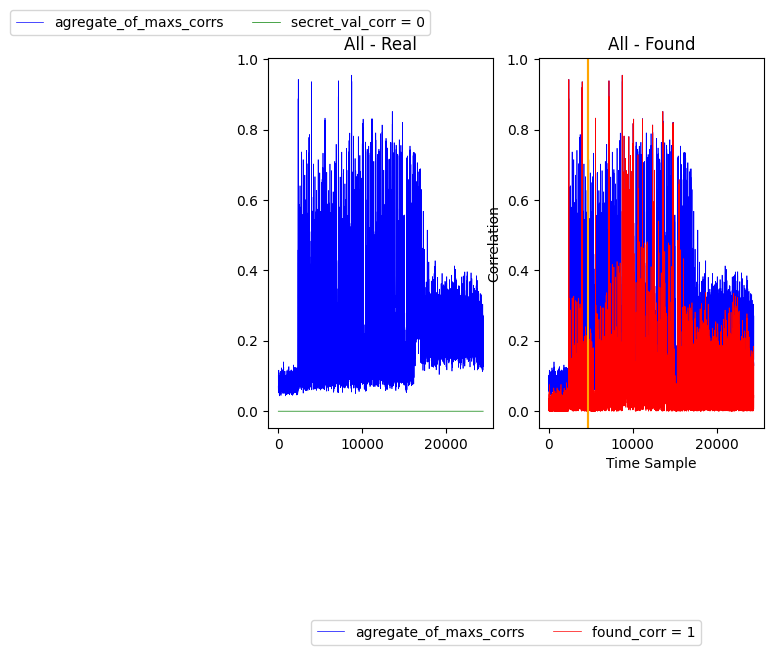

Hello 180
In range 4637 - 24429
 Found the soonest secret value is 207, at the time sample 5309, with correlation secret_corr = 0.692


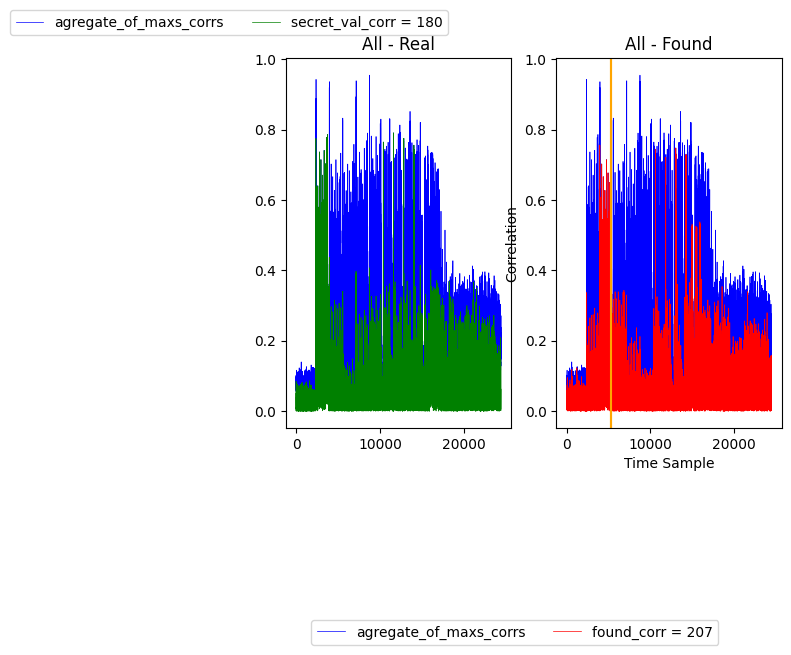

Hello 120
In range 5322 - 24429
 Found the soonest secret value is 207, at the time sample 5336, with correlation secret_corr = 0.691


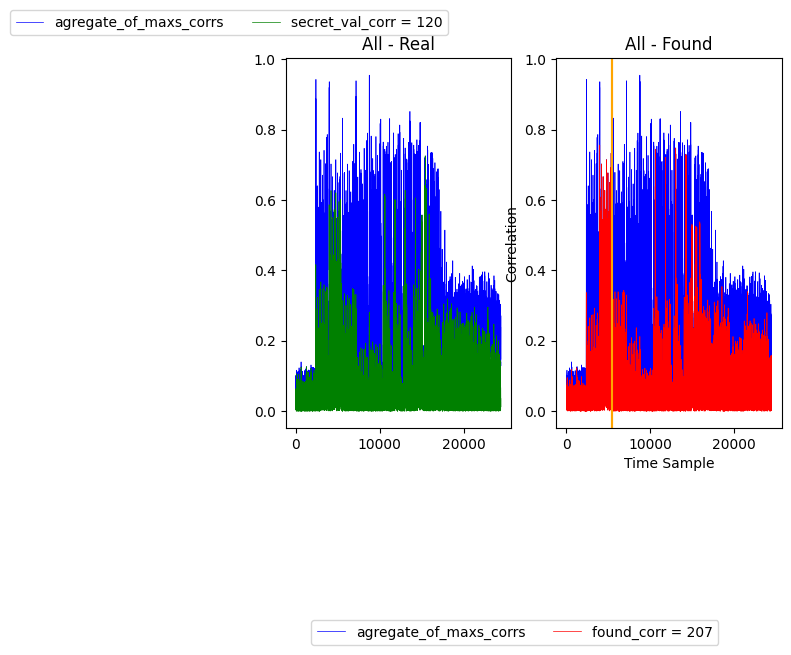

Hello 216
In range 5450 - 24429
 Found the soonest secret value is 1, at the time sample 5564, with correlation secret_corr = 0.827


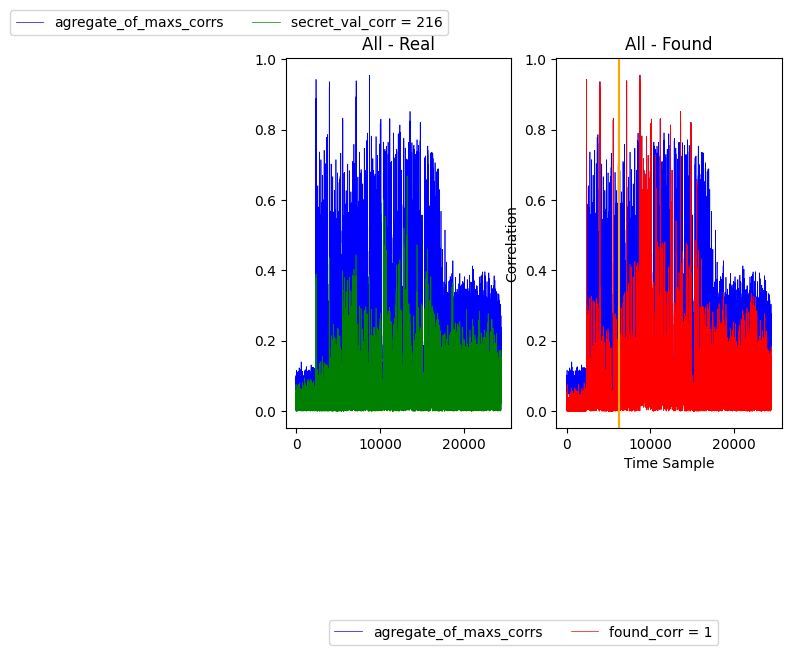

Hello 104
In range 6211 - 24429
 Found the soonest secret value is 35, at the time sample 6857, with correlation secret_corr = 0.664


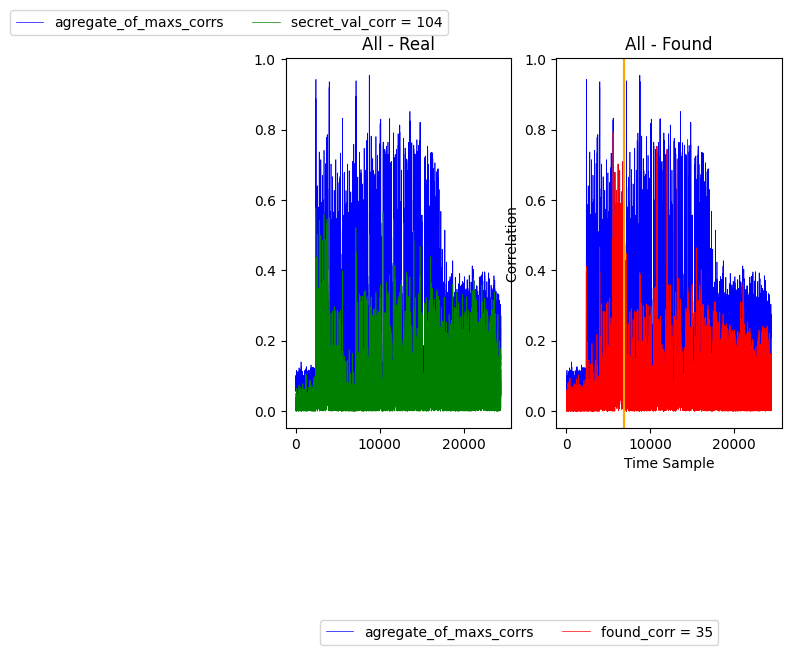

Hello 167
In range 6879 - 24429
 Found the soonest secret value is 35, at the time sample 6901, with correlation secret_corr = 0.723


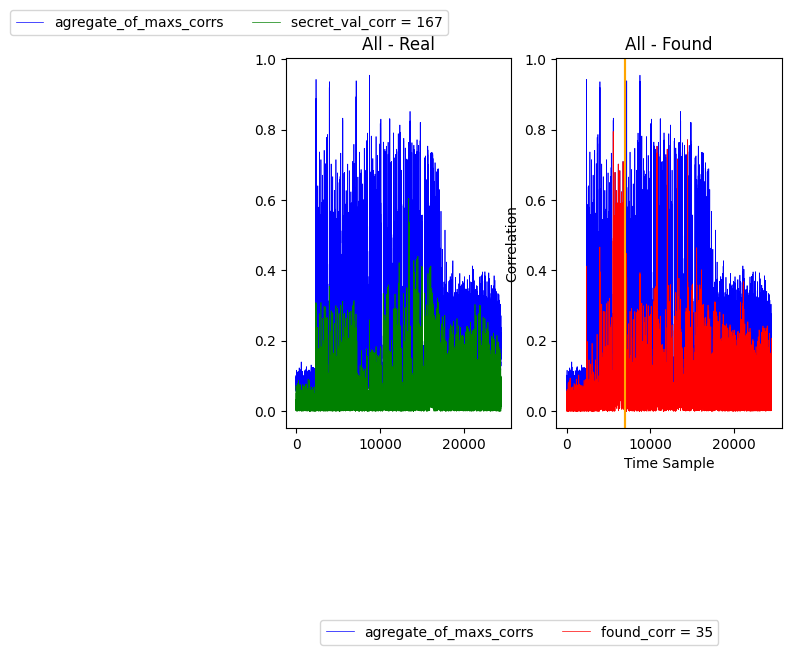

Hello 0
In range 6915 - 24429
 Found the soonest secret value is 35, at the time sample 6929, with correlation secret_corr = 0.698


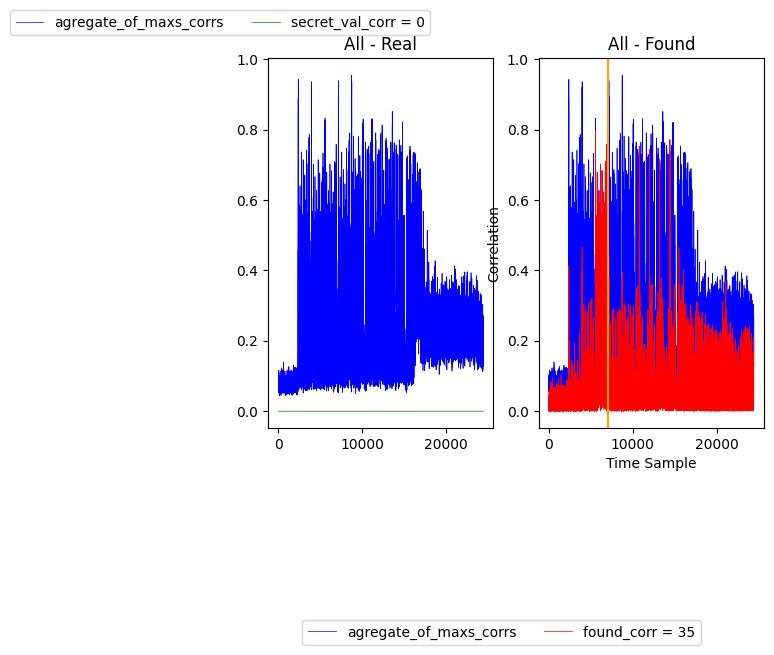

In [23]:
corr_map = abs(np.array(corr_HW32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW32_{firmwareName}')

##### CPA, weight extraction - HW8

Hello 45
Peak range: 0.3
24429
 Index of global max: 8520 and global_max_val: 0.9817314705754773


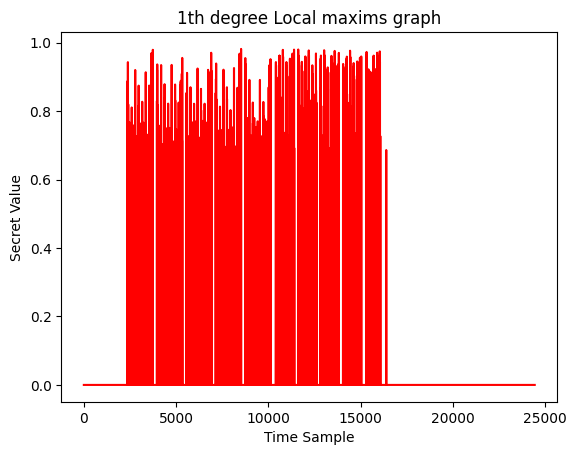

Number of uniques: 49
Number of local maxims: 555
Uniquess: [1, 45, 207, 2, 35, 70, 41, 4, 104, 216, 11, 118, 220, 82, 113, 177, 98, 136, 101, 253, 187, 184, 16, 90, 219, 182, 235, 161, 155, 179, 78, 8, 36, 114, 46, 158, 138, 86, 14, 124, 116, 240, 30, 48, 126, 200, 236, 106, 234]
Local maxims: [1, 45, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 207, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 2, 35, 2, 1, 35, 1, 1, 1, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 1, 1, 41, 1, 1, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 4

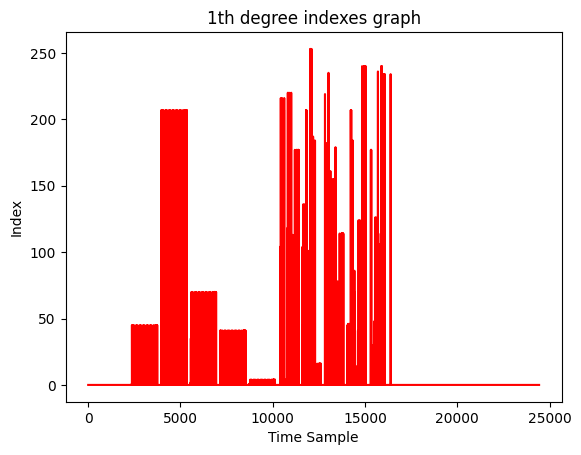

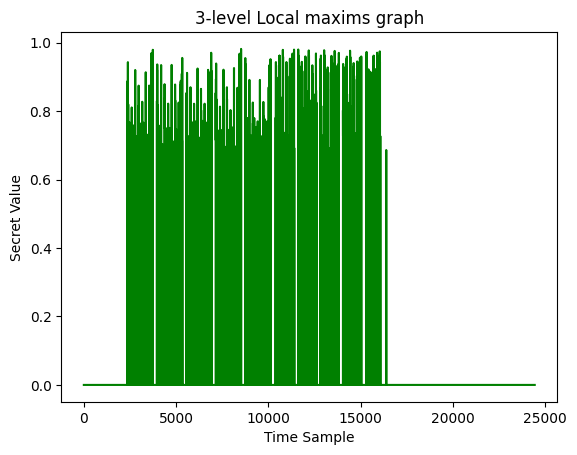

Number of uniques: 54
Number of local maxims: 620
Uniquess: [1, 45, 207, 2, 35, 70, 8, 41, 4, 104, 236, 216, 11, 118, 220, 82, 149, 113, 177, 98, 136, 221, 101, 253, 187, 184, 88, 16, 90, 219, 182, 235, 161, 155, 179, 78, 36, 114, 151, 46, 158, 197, 138, 86, 14, 124, 116, 240, 30, 48, 126, 200, 106, 234]
Local maxims: [1, 45, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 207, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 2, 35, 2, 1, 35, 1, 1, 1, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 1, 2, 1, 8, 41, 1, 1

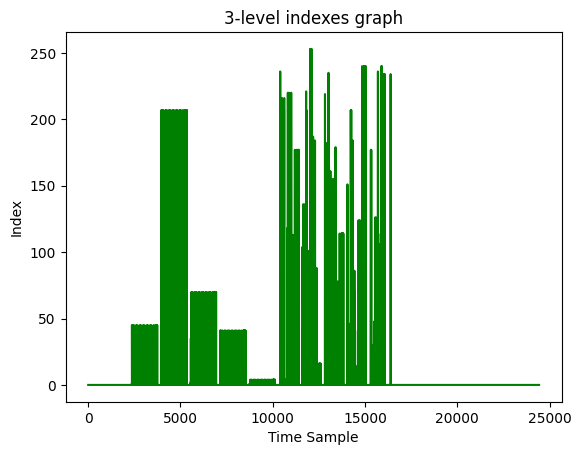

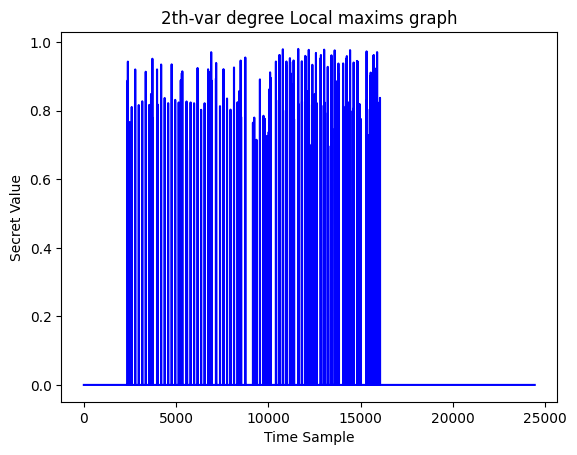

Number of uniques: 22
Number of local maxims: 150
Uniquess: [1, 45, 207, 70, 41, 4, 113, 177, 253, 184, 16, 182, 161, 155, 78, 114, 46, 240, 30, 126, 106, 234]
Local maxims: [1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 45, 45, 207, 207, 4, 70, 70, 41, 41, 113, 4, 4, 113, 177, 177, 177, 177, 177, 45, 45, 207, 207, 70, 70, 253, 253, 41, 41, 184, 4, 4, 16, 16, 16, 16, 16, 45, 45, 182, 207, 207, 161, 70, 70, 155, 41, 41, 78, 4, 4, 114, 114, 114, 114, 114, 45, 45, 46, 207, 207, 184, 70, 70, 41, 41, 4, 4, 240, 240, 177, 177, 30, 30, 16, 16, 126, 114, 114, 106, 240, 240, 234, 234, 234]


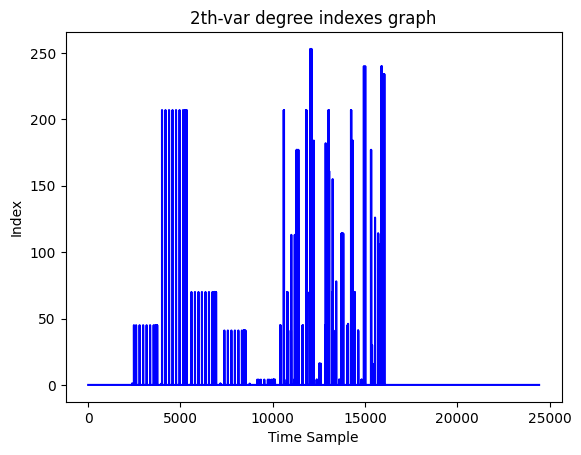

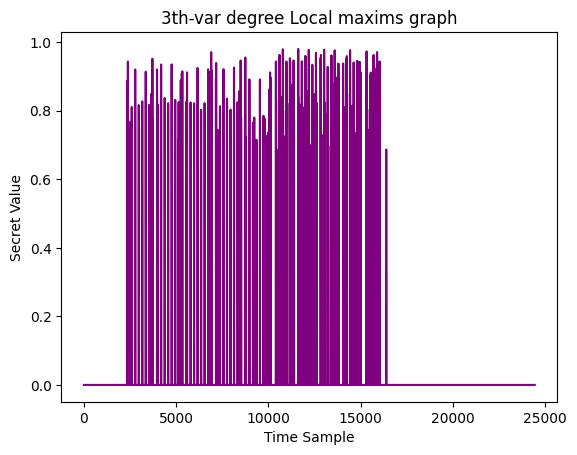

Number of uniques: 34
Number of local maxims: 252
Uniquess: [1, 45, 207, 35, 70, 41, 4, 216, 220, 113, 177, 104, 136, 101, 253, 82, 184, 16, 90, 182, 161, 155, 78, 8, 114, 46, 158, 14, 124, 240, 30, 126, 106, 234]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 35, 1, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 45, 45, 45, 216, 207, 207, 207, 4, 70, 70, 70, 70, 70, 70, 220, 41, 41, 41, 113, 4, 4, 4, 177, 177, 177, 177, 177, 177, 177, 177, 45, 104, 45, 45, 45, 45, 136, 207, 207, 207, 101, 70, 70, 70, 253, 253, 82, 41, 41, 41, 184, 4, 4, 4, 16, 16, 16, 16, 16, 16, 16, 16, 16, 90, 45, 45, 182, 207, 207, 207, 207, 161, 70, 70, 70, 70, 155, 41, 82, 41, 41, 78, 4, 8, 4, 4, 4, 

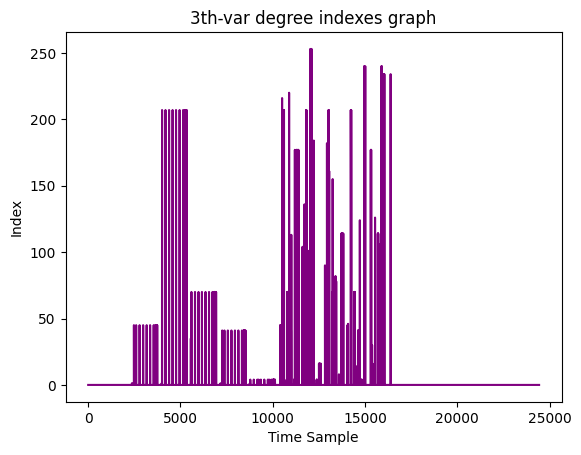

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 2375, with correlation secret_corr = 0.888


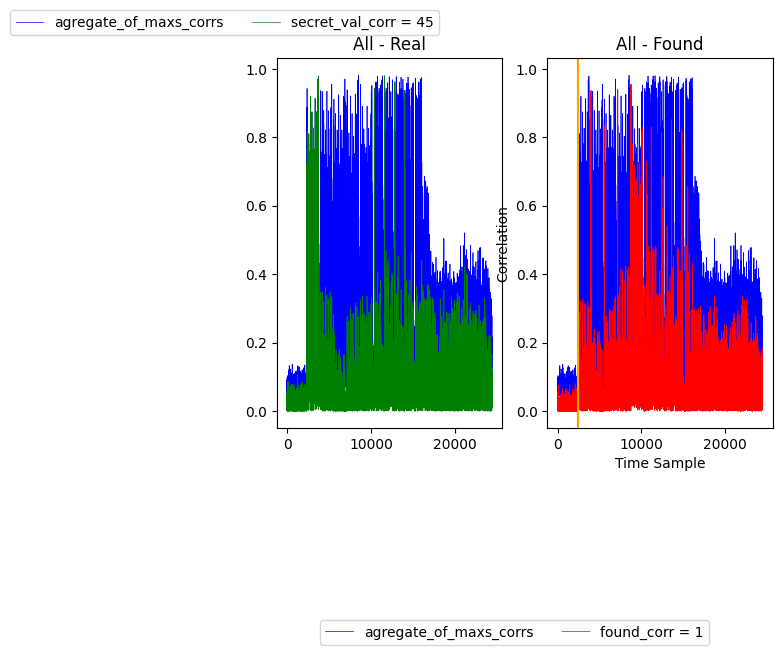

Hello 207
In range 2381 - 24429
 Found the soonest secret value is 1, at the time sample 2387, with correlation secret_corr = 0.943


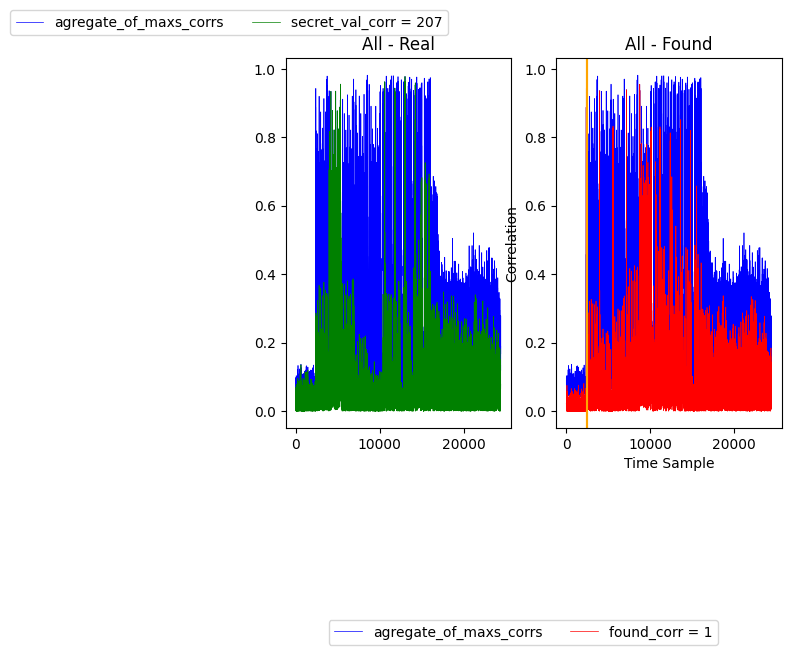

Hello 70
In range 2432 - 24429
 Found the soonest secret value is 45, at the time sample 2477, with correlation secret_corr = 0.767


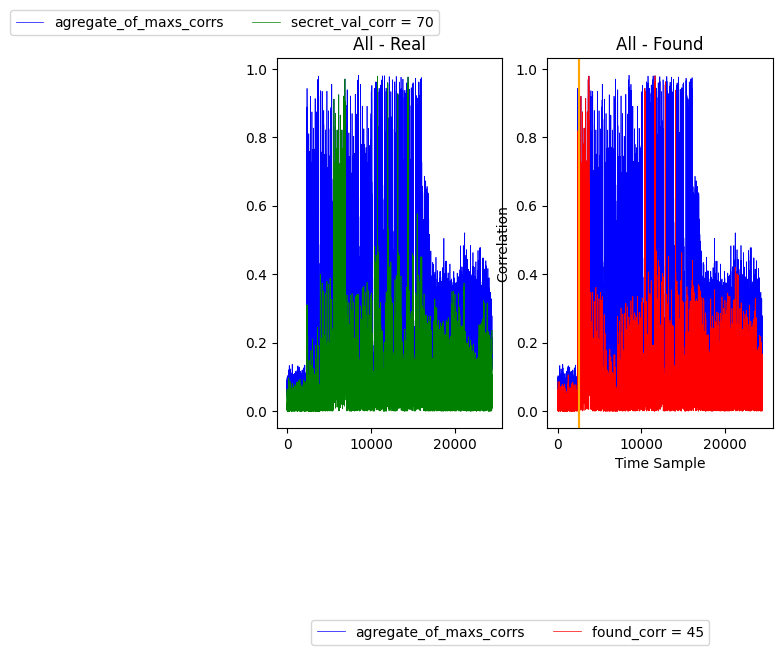

Hello 41
In range 2536 - 24429
 Found the soonest secret value is 45, at the time sample 2595, with correlation secret_corr = 0.811


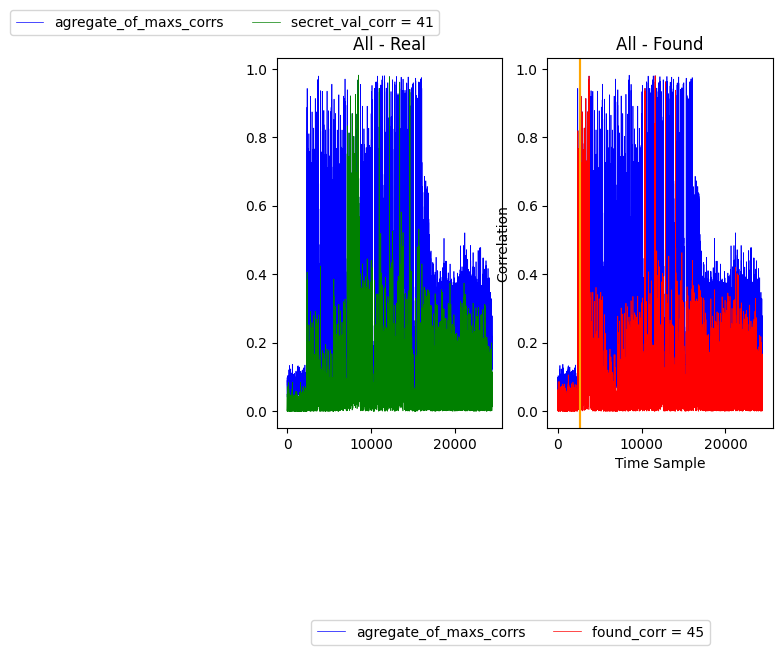

Hello 4
In range 2690 - 24429
 Found the soonest secret value is 45, at the time sample 2784, with correlation secret_corr = 0.920


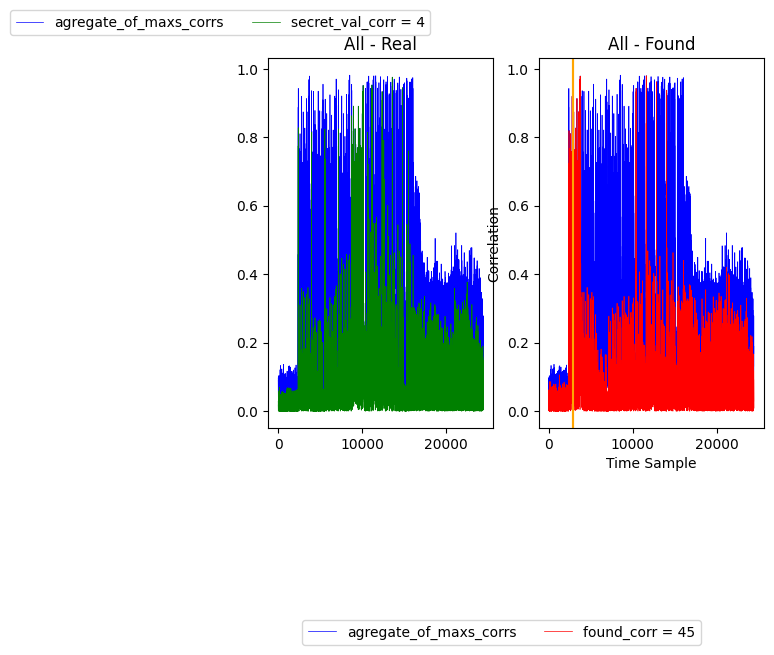

Hello 0
In range 2880 - 24429
 Found the soonest secret value is 45, at the time sample 2976, with correlation secret_corr = 0.816


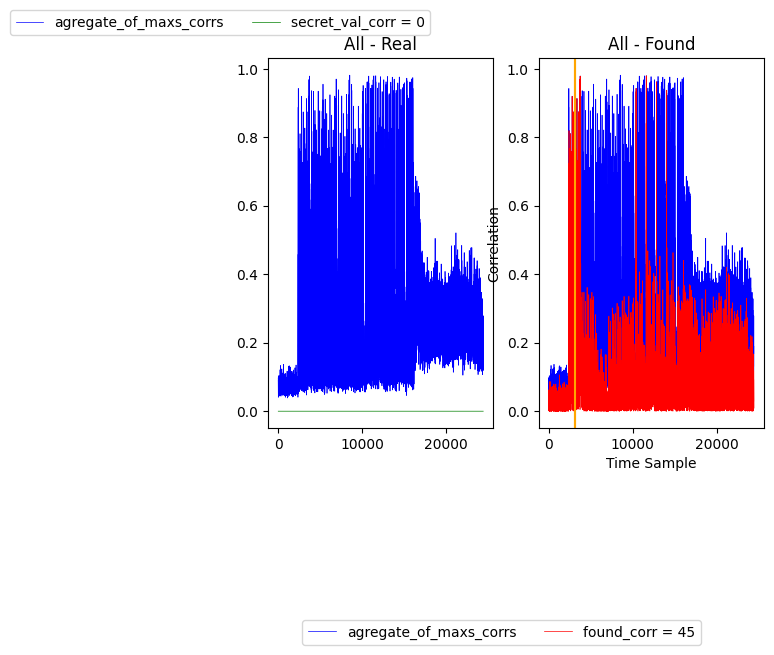

Hello 180
In range 3071 - 24429
 Found the soonest secret value is 45, at the time sample 3165, with correlation secret_corr = 0.827


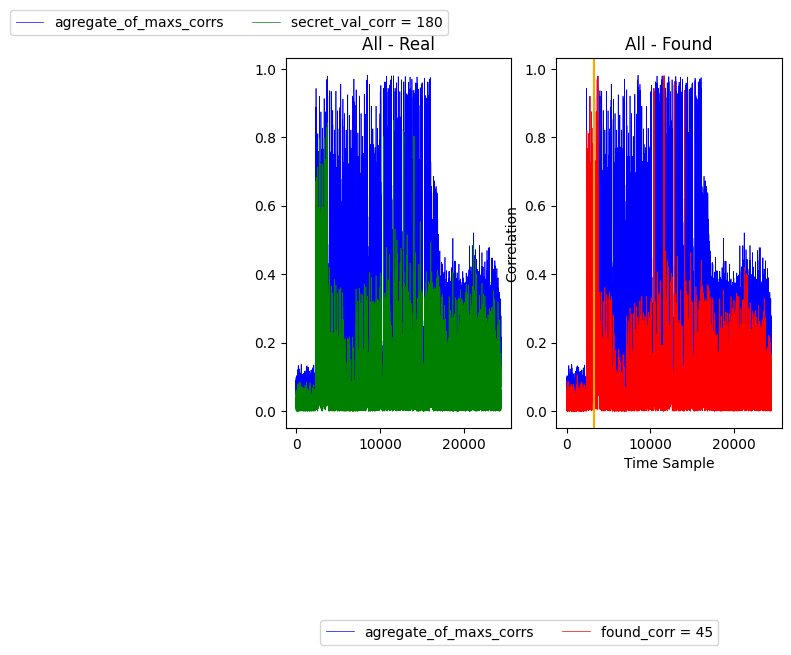

Hello 120
In range 3260 - 24429
 Found the soonest secret value is 45, at the time sample 3354, with correlation secret_corr = 0.914


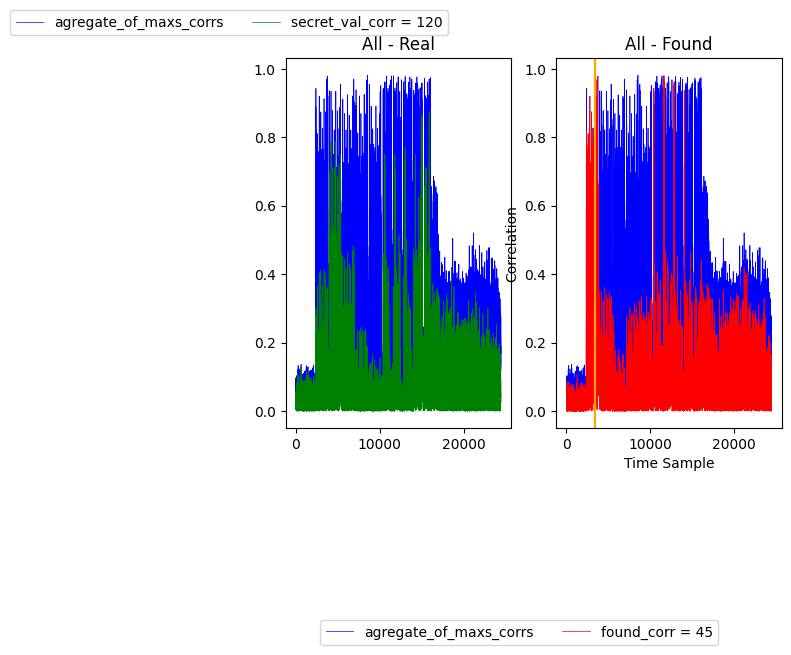

Hello 216
In range 3450 - 24429
 Found the soonest secret value is 45, at the time sample 3546, with correlation secret_corr = 0.817


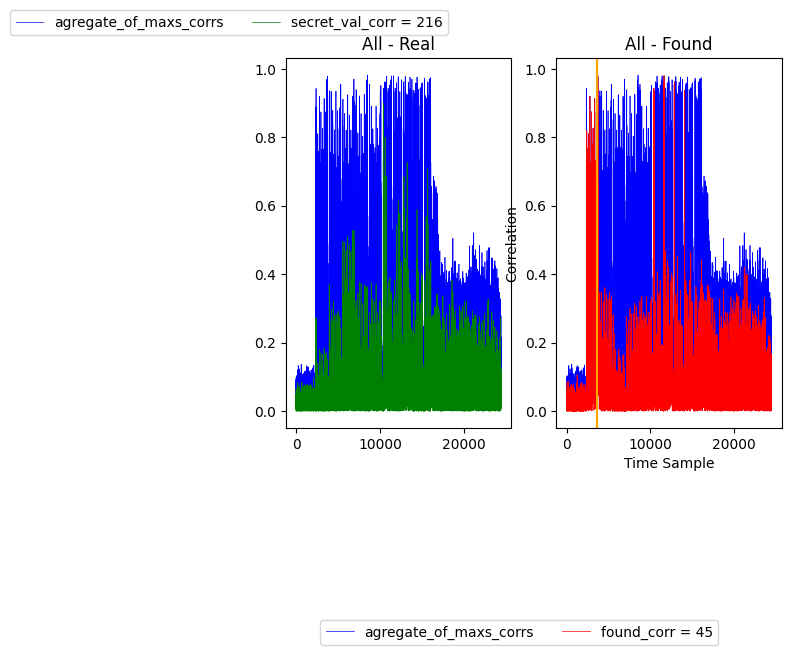

Hello 104
In range 3593 - 24429
 Found the soonest secret value is 45, at the time sample 3641, with correlation secret_corr = 0.849


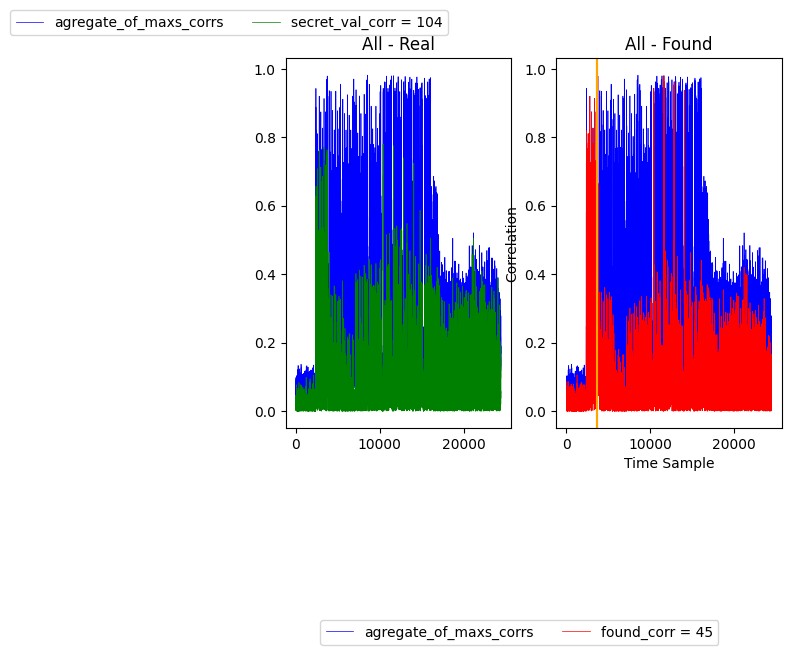

Hello 167
In range 3648 - 24429
 Found the soonest secret value is 45, at the time sample 3655, with correlation secret_corr = 0.697


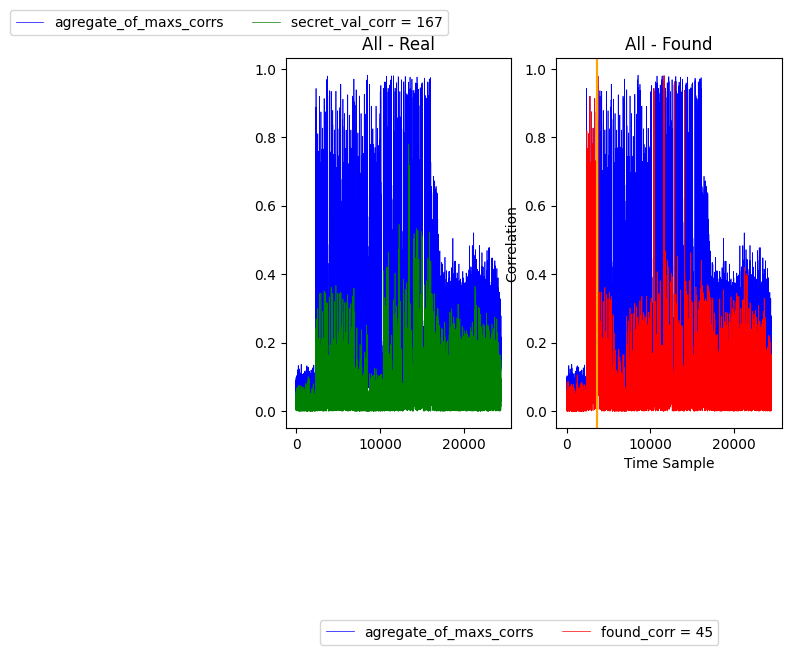

Hello 0
In range 3661 - 24429
 Found the soonest secret value is 45, at the time sample 3667, with correlation secret_corr = 0.692


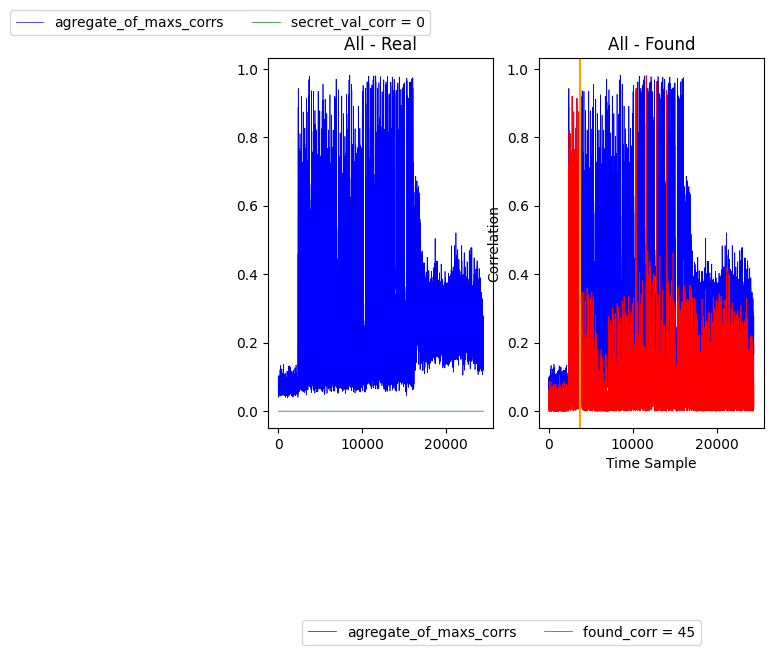

In [24]:
corr_map = abs(np.array(corr_HW8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW8_{firmwareName}')

### Current Overview and findings: 